# Telecom Churn Case Study

### Case Study Group
- Ujwal Kesharwani
- Nitish singh
- Siddhi kadam

### INDEX
1. Data Cleaning 
2. Filtering the High Value Customer
3. Defining Target Variable
4. Data Preparation
5. Data Modeling
6. Logistic Regression

### Load Moduels & Libraries

In [1]:
## !pip install pandas-profiling

In [2]:
# importing the necessary libraries 
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import time

# Supressing the warnings generated
import warnings
warnings.filterwarnings('ignore')

# Importing Pandas EDA tool
import pandas_profiling as pp
from pandas_profiling import ProfileReport

#To Display all Columns 
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
pd.set_option('display.max_colwidth', -1)

### Load Dataset

In [3]:
# Reading the csv data file and storing as the dataframe tc (telecom)
tc = pd.read_csv("telecom_churn_data.csv")

In [4]:
tc.shape ## Shape of Data

(99999, 226)

In [5]:
# Displaying the head of the DataFrame
tc.head()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,last_date_of_month_9,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_t2c_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_t2o_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,date_of_last_rech_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,date_of_last_rech_data_6,date_of_last_rech_data_7,date_of_last_rech_data_8,date_of_last_rech_data_9,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_2g_9,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,count_rech_3g_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_3g_9,arpu_2g_6,arpu_2g_7,arpu_2g_8,arpu_2g_9,night_pck_user_6,night_pck_user_7,night_pck_user_8,night_pck_user_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
0,7000842753,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,197.385,214.816,213.803,21.100,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,0.00,0.00,0.00,0.00,NaN,NaN,0.16,NaN,NaN,NaN,4.13,NaN,NaN,NaN,1.15,NaN,NaN,NaN,5.44,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,0.00,0.00,5.44,0.00,NaN,NaN,0.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.0,NaN,4,3,

In [6]:
# summary of the DataFrame
tc.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99999 entries, 0 to 99998
Data columns (total 226 columns):
 #    Column                    Dtype  
---   ------                    -----  
 0    mobile_number             int64  
 1    circle_id                 int64  
 2    loc_og_t2o_mou            float64
 3    std_og_t2o_mou            float64
 4    loc_ic_t2o_mou            float64
 5    last_date_of_month_6      object 
 6    last_date_of_month_7      object 
 7    last_date_of_month_8      object 
 8    last_date_of_month_9      object 
 9    arpu_6                    float64
 10   arpu_7                    float64
 11   arpu_8                    float64
 12   arpu_9                    float64
 13   onnet_mou_6               float64
 14   onnet_mou_7               float64
 15   onnet_mou_8               float64
 16   onnet_mou_9               float64
 17   offnet_mou_6              float64
 18   offnet_mou_7              float64
 19   offnet_mou_8              float64
 20   offn

In [7]:
## !pip install openpyxl

In [8]:
## !pip install --upgrade matplotlib

ERROR: Could not install packages due to an OSError: [Errno 2] No such file or directory: 'c:\\users\\ujwal\\anaconda3\\lib\\site-packages\\matplotlib-3.7.1.dist-info\\METADATA'



In [9]:
## !pip cache purge
## !pip install --upgrade matplotlib


Files removed: 1


ERROR: Could not install packages due to an OSError: [Errno 2] No such file or directory: 'c:\\users\\ujwal\\anaconda3\\lib\\site-packages\\matplotlib-3.7.1.dist-info\\METADATA'



In [10]:
# Reading the csv data dictonary (telecom)
tc_dict = pd.read_excel("Data+Dictionary-+Telecom+Churn+Case+Study.xlsx")

In [11]:
# Displaying the dictionary items
tc_dict

,Acronyms,Descriptions
0,MOBILE_NUMBER,Customer phone number
1,CIRCLE_ID,Telecom circle area to which the customer belongs to
2,LOC,Local calls - within same telecom circle
3,STD,STD calls - outside the calling circle
4,IC,Incoming calls
5,OG,Outgoing calls
6,T2T,"Operator T to T, i.e. within same operator (mobile to mobile)"
7,T2M,Operator T to other operator mobile
8,T2O,Operator T to other operator fixed line
9,T2F,Operator T to fixed lines of T


## 1. Data Cleaning

### Initial Statistical Analysis of the Data

In [12]:
# Generating the descriptive statistics
tc.describe().T

,count,mean,std,min,25%,50%,75%,max
mobile_number,99999.0,7.001207e+09,695669.386290,7.000000e+09,7.000606e+09,7.001205e+09,7.001812e+09,7.002411e+09
circle_id,99999.0,1.090000e+02,0.000000,1.090000e+02,1.090000e+02,1.090000e+02,1.090000e+02,1.090000e+02
loc_og_t2o_mou,98981.0,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
std_og_t2o_mou,98981.0,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
loc_ic_t2o_mou,98981.0,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
arpu_6,99999.0,2.829874e+02,328.439770,-2.258709e+03,9.341150e+01,1.977040e+02,3.710600e+02,2.773109e+04
arpu_7,99999.0,2.785366e+02,338.156291,-2.014045e+03,8.698050e+01,1.916400e+02,3.653445e+02,3.514583e+04
arpu_8,99999.0,2.791547e+02,344.474791,-9.458080e+02,8.412600e+01,1.920800e+02,3.693705e+02,3.354362e+04
arpu_9,99999.0,2.616451e+02,341.998630,-1.899505e+03,6.268500e+01,1.768490e+02,3.534665e+02,3.880562e+04
onnet_mou_6,96062.0,1.323959e+02,297.207406,0.000000e+00,7.380000e+00,3.431000e+01,1.187400e+02,7.376710e+03


In [13]:
# Getting the columns having a single value
# Empty list unique_col for storing column names
unique_col=[]
# running the loop for all the columns in the DataFrame
for i in tc.columns:
#     Counting number of distinct elements in column wise axis.
    if tc[i].nunique() == 1:   # check for unique value
        unique_col.append(i)  #  if yes then add that column in list
    else:
        pass # Pass if non unique column

tc.drop(unique_col, axis=1, inplace = True)
print("\n Columns dropped from the DataFrame\n", unique_col)
print("\nnumber of columns dropped = ", len(unique_col))


 Columns dropped from the DataFrame
 ['circle_id', 'loc_og_t2o_mou', 'std_og_t2o_mou', 'loc_ic_t2o_mou', 'last_date_of_month_6', 'last_date_of_month_7', 'last_date_of_month_8', 'last_date_of_month_9', 'std_og_t2c_mou_6', 'std_og_t2c_mou_7', 'std_og_t2c_mou_8', 'std_og_t2c_mou_9', 'std_ic_t2o_mou_6', 'std_ic_t2o_mou_7', 'std_ic_t2o_mou_8', 'std_ic_t2o_mou_9']

number of columns dropped =  16


In [14]:
# Checking the sape after dropping columns
tc.shape

(99999, 210)

#### Missing Values % Calculation

In [15]:
# Detecting the missing values in the DataFrame
((tc.isnull().sum()/tc.shape[0])*100).round(2).sort_values(ascending=False)

max_rech_data_6             74.85
fb_user_6                   74.85
count_rech_3g_6             74.85
count_rech_2g_6             74.85
night_pck_user_6            74.85
arpu_3g_6                   74.85
total_rech_data_6           74.85
av_rech_amt_data_6          74.85
arpu_2g_6                   74.85
date_of_last_rech_data_6    74.85
arpu_3g_7                   74.43
night_pck_user_7            74.43
total_rech_data_7           74.43
date_of_last_rech_data_7    74.43
av_rech_amt_data_7          74.43
max_rech_data_7             74.43
fb_user_7                   74.43
count_rech_3g_7             74.43
arpu_2g_7                   74.43
count_rech_2g_7             74.43
count_rech_3g_9             74.08
date_of_last_rech_data_9    74.08
count_rech_2g_9             74.08
fb_user_9                   74.08
total_rech_data_9           74.08
max_rech_data_9             74.08
night_pck_user_9            74.08
arpu_2g_9                   74.08
av_rech_amt_data_9          74.08
arpu_3g_9     

#### Converting columns with datetime values to datetime format

In [16]:
# Date columns based on the column dtypes of object.

date_col= tc.select_dtypes(include=['object'])
print("\nFollowing columns misrepresented as object\n",date_col.columns)

# Converting the columns of date_col to datetime format
for i in date_col.columns:
    tc[i] = pd.to_datetime(tc[i])


Following columns misrepresented as object
 Index(['date_of_last_rech_6', 'date_of_last_rech_7', 'date_of_last_rech_8',
       'date_of_last_rech_9', 'date_of_last_rech_data_6',
       'date_of_last_rech_data_7', 'date_of_last_rech_data_8',
       'date_of_last_rech_data_9'],
      dtype='object')


In [17]:
# check for conversion of format
tc.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99999 entries, 0 to 99998
Data columns (total 210 columns):
 #    Column                    Dtype         
---   ------                    -----         
 0    mobile_number             int64         
 1    arpu_6                    float64       
 2    arpu_7                    float64       
 3    arpu_8                    float64       
 4    arpu_9                    float64       
 5    onnet_mou_6               float64       
 6    onnet_mou_7               float64       
 7    onnet_mou_8               float64       
 8    onnet_mou_9               float64       
 9    offnet_mou_6              float64       
 10   offnet_mou_7              float64       
 11   offnet_mou_8              float64       
 12   offnet_mou_9              float64       
 13   roam_ic_mou_6             float64       
 14   roam_ic_mou_7             float64       
 15   roam_ic_mou_8             float64       
 16   roam_ic_mou_9             float64     

### Missing Values Imputation

#### Missing Value Imputation for "Data Recharge" Columns

In [18]:
# Checking the columns with `data recharge` attributes
tc[['date_of_last_rech_data_6','total_rech_data_6','max_rech_data_6']].head()

,date_of_last_rech_data_6,total_rech_data_6,max_rech_data_6
0,2014-06-21,1.0,252.0
1,NaT,NaN,NaN
2,NaT,NaN,NaN
3,NaT,NaN,NaN
4,2014-06-04,1.0,56.0



As we can see that when there is no data in date_of_last_rech_data_6, Furthere total_rech_data_6 and max_rech_data_6 are also missing which indicating that the customer has not made a internet recharge

Thus this is can be consideed as meaningful missing.

Hence, imputing 0 for their values for all such cases in month 6, 7, 8 and 9

In [19]:
# Imputing 0 for missing values
for i in range(len(tc)):
  # Imputing 'total_rech_data', 'max_rech_data' for month 6
    if pd.isnull((tc['total_rech_data_6'][i]) and (tc['max_rech_data_6'][i])):
        if pd.isnull(tc['date_of_last_rech_data_6'][i]):
            tc['total_rech_data_6'][i]=0
            tc['max_rech_data_6'][i]=0

  # Imputing 'total_rech_data', 'max_rech_data' for month 7
    if pd.isnull((tc['total_rech_data_7'][i]) and (tc['max_rech_data_7'][i])):
        if pd.isnull(tc['date_of_last_rech_data_7'][i]):
            tc['total_rech_data_7'][i]=0
            tc['max_rech_data_7'][i]=0

  # Imputing 'total_rech_data', 'max_rech_data' for month 8
    if pd.isnull((tc['total_rech_data_8'][i]) and (tc['max_rech_data_8'][i])):
        if pd.isnull(tc['date_of_last_rech_data_8'][i]):
            tc['total_rech_data_8'][i]=0
            tc['max_rech_data_8'][i]=0

        
  # Imputing 'total_rech_data', 'max_rech_data' for month 9 
    if pd.isnull((tc['total_rech_data_9'][i]) and (tc['max_rech_data_9'][i])):
        if pd.isnull(tc['date_of_last_rech_data_9'][i]):
            tc['total_rech_data_9'][i]=0
            tc['max_rech_data_9'][i]=0

#### Missing Values Handling for count recharge columns

In [20]:
# Checking columns with count recharge attributes
tc[['count_rech_2g_6','count_rech_3g_6','total_rech_data_6']].head()

,count_rech_2g_6,count_rech_3g_6,total_rech_data_6
0,0.0,1.0,1.0
1,NaN,NaN,0.0
2,NaN,NaN,0.0
3,NaN,NaN,0.0
4,1.0,0.0,1.0


As we can see that when there is no data in total_rech_data_6. Also count_rech_2g_6 and count_rech_3g_6 are also missing which shows that the customer has not recharged for internet

Also, we can see that the total of count_rech_2g_6 and count_rech_3g_6 gives total_rech_data_6

Therefore, we will drop the count_rech_2g_6 and count_rech_3g_6as it causes the multicollinearity issue.

Further doing the same for all values for all such cases in month 6, 7, 8 and 9

In [21]:
# Dropping columns 'count_rech_2g_*' & 'count_rech_3g_*' for the months 6,7,8 and 9 
tc.drop(['count_rech_2g_6', 'count_rech_3g_6',
       'count_rech_2g_7','count_rech_3g_7',
       'count_rech_2g_8','count_rech_3g_8',
       'count_rech_2g_9','count_rech_3g_9'],axis=1, inplace=True)

In [22]:
# Checking dimensions after dropping.
tc.shape

(99999, 202)

#### Handeling Missing Values for count arpu_3g and arpu_2g columns against months 6,7,8 and 9

In [23]:
# Checking the columns with `arpu` attributes
tc[['arpu_3g_6','arpu_2g_6','av_rech_amt_data_6']].head()

,arpu_3g_6,arpu_2g_6,av_rech_amt_data_6
0,212.17,212.17,252.0
1,NaN,NaN,NaN
2,NaN,NaN,NaN
3,NaN,NaN,NaN
4,0.00,0.00,56.0


In [24]:
# Checking for correlation between the "arpu_3g", "arpu_2g", "av_rech_amt_data" columns for months 6,7,8 and 9
print("Correlation table for month 6\n\n", tc[['arpu_3g_6','arpu_2g_6','av_rech_amt_data_6']].corr())
print("\nCorrelation table for month 7\n\n", tc[['arpu_3g_7','arpu_2g_7','av_rech_amt_data_7']].corr())
print("\nCorrelation table for month 8\n\n", tc[['arpu_3g_8','arpu_2g_8','av_rech_amt_data_8']].corr())
print("\nCorrelation table for month 9\n\n", tc[['arpu_3g_9','arpu_2g_9','av_rech_amt_data_9']].corr())

Correlation table for month 6

                     arpu_3g_6  arpu_2g_6  av_rech_amt_data_6
arpu_3g_6           1.000000   0.932232   0.809695          
arpu_2g_6           0.932232   1.000000   0.834065          
av_rech_amt_data_6  0.809695   0.834065   1.000000          

Correlation table for month 7

                     arpu_3g_7  arpu_2g_7  av_rech_amt_data_7
arpu_3g_7           1.000000   0.930366   0.796131          
arpu_2g_7           0.930366   1.000000   0.815933          
av_rech_amt_data_7  0.796131   0.815933   1.000000          

Correlation table for month 8

                     arpu_3g_8  arpu_2g_8  av_rech_amt_data_8
arpu_3g_8           1.000000   0.924925   0.787165          
arpu_2g_8           0.924925   1.000000   0.805482          
av_rech_amt_data_8  0.787165   0.805482   1.000000          

Correlation table for month 9

                     arpu_3g_9  arpu_2g_9  av_rech_amt_data_9
arpu_3g_9           1.000000   0.852253   0.722932          
arpu_2g_9      

As there is very high correlation between arpu_2g_* and arpu_3g_* with av_rech_amt_data*

Hence dropping the arpu_2g_* and arpu_3g_* as to avoid multicollinearity issues

Reapeating the same for months 7, 8 and 9

In [25]:
# Dropping the columns 'arpu_3g_*'&'arpu_2g_*' in month 6,7,8 and 9 
tc.drop(['arpu_3g_6','arpu_2g_6',
                  'arpu_3g_7','arpu_2g_7',
                  'arpu_3g_8','arpu_2g_8',
                  'arpu_3g_9','arpu_2g_9'],axis=1, inplace=True)

In [26]:
# Checking Shape after dropping.
tc.shape

(99999, 194)

####  Handling Missing Values for columns having above 50% missing values

The column fb_user_* and night_pck_user_* for each month from 6 to 9 respectively has a missing values above 50%

Hence drop the fb_user_* and night_pck_user_* as not aiding for further analysis

Also doing this for all months 6, 7, 8 and 9

In [27]:
tc.drop(['fb_user_6','fb_user_7','fb_user_8','fb_user_9',
                  'night_pck_user_6','night_pck_user_7','night_pck_user_8','night_pck_user_9'],
                  axis=1, inplace=True)

In [28]:
# Checking Shape after dropping.
tc.shape

(99999, 186)

#### Handling the missing values for  av_rech_amt_data_* for months 6,7,8 and 9

In [29]:
# Checking the related columns values
tc[['av_rech_amt_data_6','total_rech_data_6']].head()

,av_rech_amt_data_6,total_rech_data_6
0,252.0,1.0
1,NaN,0.0
2,NaN,0.0
3,NaN,0.0
4,56.0,1.0


If total_rech_data_6 is zero then av_rech_amt_data_6 also zero

Hence, impute the NaN in the arpav_rech_amt_data_6 with 0 if total_rech_data_6* is 0

Also doing this for all months 6, 7, 8 and 9

In [30]:
# Checking for condition & imputating with 0

for i in range(len(tc)):
  # Imputing for month 6
    if (pd.isnull(tc['av_rech_amt_data_6'][i]) and (tc['total_rech_data_6'][i]==0)):
        tc['av_rech_amt_data_6'][i] = 0

  # Imputing for month 7
    if (pd.isnull(tc['av_rech_amt_data_7'][i]) and (tc['total_rech_data_7'][i]==0)):
        tc['av_rech_amt_data_7'][i] = 0

  # Imputing for month 8
    if (pd.isnull(tc['av_rech_amt_data_8'][i]) and (tc['total_rech_data_8'][i]==0)):
        tc['av_rech_amt_data_8'][i] = 0

  # Imputing for month 9
    if (pd.isnull(tc['av_rech_amt_data_9'][i]) and (tc['total_rech_data_9'][i]==0)):
        tc['av_rech_amt_data_9'][i] = 0

In [31]:
# Checking for % missing values in other attributes
((tc.isnull().sum()/tc.shape[0])*100).round(2).sort_values(ascending=False)

date_of_last_rech_data_6    74.85
date_of_last_rech_data_7    74.43
date_of_last_rech_data_9    74.08
date_of_last_rech_data_8    73.66
og_others_9                 7.75 
loc_og_t2f_mou_9            7.75 
loc_og_t2t_mou_9            7.75 
loc_ic_t2f_mou_9            7.75 
std_ic_mou_9                7.75 
std_og_t2f_mou_9            7.75 
loc_og_t2m_mou_9            7.75 
loc_ic_mou_9                7.75 
std_og_t2m_mou_9            7.75 
std_ic_t2f_mou_9            7.75 
std_ic_t2t_mou_9            7.75 
loc_og_t2c_mou_9            7.75 
std_ic_t2m_mou_9            7.75 
std_og_t2t_mou_9            7.75 
loc_og_mou_9                7.75 
std_og_mou_9                7.75 
spl_ic_mou_9                7.75 
roam_og_mou_9               7.75 
spl_og_mou_9                7.75 
loc_ic_t2t_mou_9            7.75 
isd_og_mou_9                7.75 
roam_ic_mou_9               7.75 
loc_ic_t2m_mou_9            7.75 
isd_ic_mou_9                7.75 
onnet_mou_9                 7.75 
ic_others_9   

In [32]:
# Checking info of the dataframe
tc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99999 entries, 0 to 99998
Columns: 186 entries, mobile_number to sep_vbc_3g
dtypes: datetime64[ns](8), float64(144), int64(34)
memory usage: 141.9 MB


The attribute :date_of_last_rech_data_* is of no use now as attributes total_rech_data_* & max_rech_data_* have already been imputed

Further attribute date_of_last_rech_*" is of no use now as we have already used the datetime column

Hence as the missing value percentage is high for this column the attribute can be dropped.

Also doing this for all months 6, 7, 8 and 9

In [33]:
# Dropping the columns related to datetime dtype from the DataFrame
tc.drop(["date_of_last_rech_data_6","date_of_last_rech_data_7",
                   "date_of_last_rech_data_8","date_of_last_rech_data_9"], axis=1, inplace=True)
print("\nThe columns 'date_of_last_rech_data_6','date_of_last_rech_data_7','date_of_last_rech_data_8','date_of_last_rech_data_9' are dropped as it has no significance to the data\n")


The columns 'date_of_last_rech_data_6','date_of_last_rech_data_7','date_of_last_rech_data_8','date_of_last_rech_data_9' are dropped as it has no significance to the data



In [34]:
# Dropping the columns related to datetime dtype from the DataFrame
tc.drop(["date_of_last_rech_6","date_of_last_rech_7",
                   "date_of_last_rech_8","date_of_last_rech_9"], axis=1, inplace=True)

In [35]:
# Checking Shape after dropping.
tc.shape

(99999, 178)

##### Since the columns used to determine the High Value Customer is clear of null values, we can filter the overall data and then handle the remaining missing values for each column

#### Feature Engineering to create new columns

In [36]:
# Since, we have only average recharge amount for Customer we need the total recharge amount


 # Calculating the total recharge amount done for data alone in months 6
tc['total_rech_amt_data_6']=tc['av_rech_amt_data_6'] * tc['total_rech_data_6']
 # Calculating the total recharge amount done for data alone in months 7
tc['total_rech_amt_data_7']=tc['av_rech_amt_data_7'] * tc['total_rech_data_7']

# Calculating the overall recharge amount ( Data + Call) for the months 6
tc['overall_rech_amt_6'] = tc['total_rech_amt_data_6'] + tc['total_rech_amt_6']
# Calculating the overall recharge amount ( Data + Call) for the months 7
tc['overall_rech_amt_7'] = tc['total_rech_amt_data_7'] + tc['total_rech_amt_7']

# Calculating the average recharge done by customer in months 6th and 7th
tc['avg_rech_amt_6_7'] = (tc['overall_rech_amt_6'] + tc['overall_rech_amt_7'])/2

## 2.Filtering the High Value Customer

In [37]:
# Finding the value of 70th percentile in the overall revenues defining the high value customer creteria for the company

cut_off = tc['avg_rech_amt_6_7'].quantile(0.70)
print("The 70th quantile value to determine the High Value Customer is: ",cut_off,)

# Considering only the top 30 % based on the average recharge amount as High Value Customer
tc = tc[tc['avg_rech_amt_6_7'] >= cut_off]

The 70th quantile value to determine the High Value Customer is:  478.0


In [38]:
# Checking Shape after dropping.
tc.shape

(30001, 183)

In [39]:
# Checking the missing values percentages again for the HVC (High Value Customer) group

((tc.isnull().sum()/tc.shape[0])*100).round(2).sort_values(ascending=False)

loc_ic_t2f_mou_9         6.34
spl_og_mou_9             6.34
loc_og_t2m_mou_9         6.34
loc_og_t2f_mou_9         6.34
loc_ic_t2t_mou_9         6.34
isd_og_mou_9             6.34
loc_og_t2t_mou_9         6.34
loc_ic_t2m_mou_9         6.34
std_og_t2t_mou_9         6.34
roam_og_mou_9            6.34
std_og_mou_9             6.34
loc_ic_mou_9             6.34
std_ic_t2t_mou_9         6.34
roam_ic_mou_9            6.34
loc_og_t2c_mou_9         6.34
std_ic_t2m_mou_9         6.34
offnet_mou_9             6.34
std_ic_t2f_mou_9         6.34
std_og_t2f_mou_9         6.34
std_ic_mou_9             6.34
onnet_mou_9              6.34
spl_ic_mou_9             6.34
loc_og_mou_9             6.34
isd_ic_mou_9             6.34
std_og_t2m_mou_9         6.34
ic_others_9              6.34
og_others_9              6.34
std_og_mou_8             3.91
isd_og_mou_8             3.91
std_og_t2f_mou_8         3.91
std_ic_t2t_mou_8         3.91
og_others_8              3.91
loc_ic_t2t_mou_8         3.91
loc_ic_t2m

#### Imuting the remaining attributes with advanced imputation technique like `KNNImputer`

In [40]:
# Ceaating a tuple for Numerical values
num_col = tc.select_dtypes(include = ['int64','float64']).columns.tolist()

In [41]:
# Importing the libraries
from sklearn.impute import KNNImputer
from sklearn.preprocessing import MinMaxScaler

# Transforming features by scaling each feature to a given range.
scalar = MinMaxScaler()
    
# Scaling and transforming the data for the columns that are numerical
tc[num_col]=scalar.fit_transform(tc[num_col])

# Calling the KNN Imputer function
knn=KNNImputer(n_neighbors=3)

# Imputing the NaN values using KNN Imputer
tc_knn = pd.DataFrame(knn.fit_transform(tc[num_col]))
tc_knn.columns=tc[num_col].columns

In [42]:
# check for any null values after imputation for numerical columns
tc_knn.isnull().sum().sum()

0

KNN Imputer has imputed all missing values successfully

In [43]:
# Since we sclaed the numerical columns for the purpose of handling the null values, 
# We need to restore the sclaed alues to its original form.

# Converting the scaled data back to the original data
tc[num_col]=scalar.inverse_transform(tc_knn)

# Checking the top 10 data
tc.head()

,mobile_number,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,total_rech_amt_data_6,total_rech_amt_data_7,overall_rech_amt_6,overall_rech_amt_7,avg_rech_amt_6_7
0,7.000843e+09,197.385,214.816,213.803,21.100,53.27,24.613333,0.00,33.590000,84.23,23.993333,0.00,27.833333,0.00,0.00,0.00,0.000000,0.00,0.00,0.00,0.000000,53.27,24.613333,0.00,33.206667,79.27,18.196667,0.00,24.193333,0.403333,4.813333,0.00,2.69,0.353333,0.0,0.00,0.243333,132.953333,47.636667,0.00,60.096667,0.00,0.00,0.00,0.383333,0.41,0.976667,0.00,0.943333,0.00,0.00,0.00,0.00,0.41,0.976667,0.00,1.326667,0.0,0.00,0.00,0.000000,4.14,0.326667,0.00,0.663333,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.00,44.493333,13.396667,0.16,32.263333,69.183333,62.85,4.13,38.553333,17.74,22.503333,1.15,11.360000,131.433333,98.76,5.44,82.186667,0.00,3.366667,0.00,0.000000,0.583333,0.37,0.00,1.456667,1.243333,1.113333,0.00,1.656667,1.826667,4.853333,0.00,3.116667,0.00,0.00,5.44,0.00,0.043333,0.0,0.0,0.093333,0.00,0.00,0.00,0.00,0.00,0.55,0.00,0.203333,4.0,3.0,2.0,6.0,362.0,252.0,252.0,0.0,252.0,252.0,252.0,0.0,252.0,252.0,252.0,0.0,1.0,1.0,1.0,0.0,252.0,252.0,252.0,0.0,252.0,252.0,252.0,0.0,30.13,1.32,5.75,0.00,83.57,150.76,109.61,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,968.0,30.40,0.00,101.20,3.58,252.0,252.0,614.0,504.0,559.0
7,7.000702e+09,1069.180,1349.850,3171.480,500.000,57.84,54.680000,52.29,65.276667,453.43,567.160000,325.91,172.050000,16.23,33.49,31.64,4.776667,23.74,12.59

In [44]:
# Final Check for missing values
((tc.isnull().sum()/tc.shape[0])*100).round(2).sort_values(ascending=False)

mobile_number            0.0
isd_ic_mou_8             0.0
ic_others_6              0.0
ic_others_7              0.0
ic_others_8              0.0
ic_others_9              0.0
total_rech_num_6         0.0
total_rech_num_7         0.0
total_rech_num_8         0.0
total_rech_num_9         0.0
total_rech_amt_6         0.0
total_rech_amt_7         0.0
total_rech_amt_8         0.0
total_rech_amt_9         0.0
max_rech_amt_6           0.0
max_rech_amt_7           0.0
max_rech_amt_8           0.0
max_rech_amt_9           0.0
last_day_rch_amt_6       0.0
last_day_rch_amt_7       0.0
last_day_rch_amt_8       0.0
isd_ic_mou_9             0.0
isd_ic_mou_7             0.0
total_rech_data_6        0.0
isd_ic_mou_6             0.0
std_ic_t2m_mou_7         0.0
std_ic_t2m_mou_8         0.0
std_ic_t2m_mou_9         0.0
std_ic_t2f_mou_6         0.0
std_ic_t2f_mou_7         0.0
std_ic_t2f_mou_8         0.0
std_ic_t2f_mou_9         0.0
std_ic_mou_6             0.0
std_ic_mou_7             0.0
std_ic_mou_8  

## 3.Defining Target Variable

#### Churn variable

There are 2 types of Churn


##### Usage Based Churn : Completely inactive Customers

Incoming Services: Inactive

Outgoing services - Inactive

Data services(2g, 3g) - Inactive

##### Revenue Based Churn : Partial Inactive Customers

Incoming Services : Active

Outgoing services - Inactive

Data services(2g, 3g) - Inactive


<br>
9th Month is our Churn Phase. Usage-based churn
For that, we need to derive churn variable using

##### `total_ic_mou_9`,`total_og_mou_9`,`vol_2g_mb_9` & `vol_3g_mb_9` attributes

**<br>Calculation of total incoming and outgoing minutes of usage & 2g and 3g data consumption <br>**

In [45]:
# Selecting the columns defining the churn variable (i.e. TARGET Variable)
churn_col=['total_ic_mou_9','total_og_mou_9','vol_2g_mb_9','vol_3g_mb_9']
tc[churn_col].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30001 entries, 0 to 99997
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   total_ic_mou_9  30001 non-null  float64
 1   total_og_mou_9  30001 non-null  float64
 2   vol_2g_mb_9     30001 non-null  float64
 3   vol_3g_mb_9     30001 non-null  float64
dtypes: float64(4)
memory usage: 1.1 MB


**Those who have not used either calls or internet in the month of semptember are the customers who have churned**

In [46]:
# Defining the churn variable:
tc['churn']=0

# Imputing the churn values based on the condition:
# Total incoming Mou ==0 and
# Total outgoing Mou ==0 and
# Total  2g Data ==0 and
# Total  3g Data ==0
# if everything is zero for the customers then tag it as zero else 1
tc['churn'] = np.where(tc[churn_col].sum(axis=1) == 0, 1, 0)

In [47]:
# Checking the head of the data frame
tc.head()

,mobile_number,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,total_rech_amt_data_6,total_rech_amt_data_7,overall_rech_amt_6,overall_rech_amt_7,avg_rech_amt_6_7,churn
0,7.000843e+09,197.385,214.816,213.803,21.100,53.27,24.613333,0.00,33.590000,84.23,23.993333,0.00,27.833333,0.00,0.00,0.00,0.000000,0.00,0.00,0.00,0.000000,53.27,24.613333,0.00,33.206667,79.27,18.196667,0.00,24.193333,0.403333,4.813333,0.00,2.69,0.353333,0.0,0.00,0.243333,132.953333,47.636667,0.00,60.096667,0.00,0.00,0.00,0.383333,0.41,0.976667,0.00,0.943333,0.00,0.00,0.00,0.00,0.41,0.976667,0.00,1.326667,0.0,0.00,0.00,0.000000,4.14,0.326667,0.00,0.663333,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.00,44.493333,13.396667,0.16,32.263333,69.183333,62.85,4.13,38.553333,17.74,22.503333,1.15,11.360000,131.433333,98.76,5.44,82.186667,0.00,3.366667,0.00,0.000000,0.583333,0.37,0.00,1.456667,1.243333,1.113333,0.00,1.656667,1.826667,4.853333,0.00,3.116667,0.00,0.00,5.44,0.00,0.043333,0.0,0.0,0.093333,0.00,0.00,0.00,0.00,0.00,0.55,0.00,0.203333,4.0,3.0,2.0,6.0,362.0,252.0,252.0,0.0,252.0,252.0,252.0,0.0,252.0,252.0,252.0,0.0,1.0,1.0,1.0,0.0,252.0,252.0,252.0,0.0,252.0,252.0,252.0,0.0,30.13,1.32,5.75,0.00,83.57,150.76,109.61,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,968.0,30.40,0.00,101.20,3.58,252.0,252.0,614.0,504.0,559.0,1
7,7.000702e+09,1069.180,1349.850,3171.480,500.000,57.84,54.680000,52.29,65.276667,453.43,567.160000,325.91,172.050000,16.23,33.49,31.64,4.776667,23.

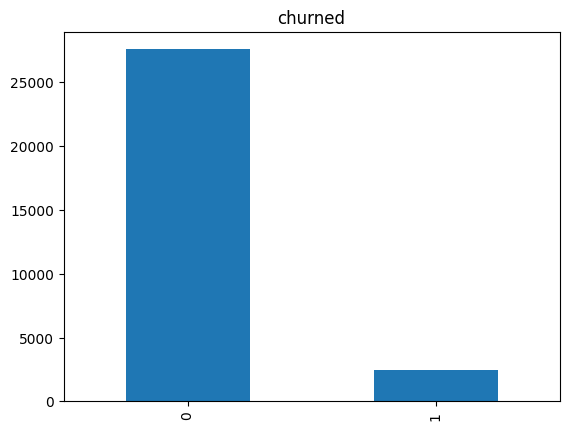

In [48]:
# Barplot of the churned values
tc['churn'].value_counts().plot(kind ='bar').set_title('churned')
plt.show()

0    91.863605
1    8.136395 
Name: churn, dtype: float64


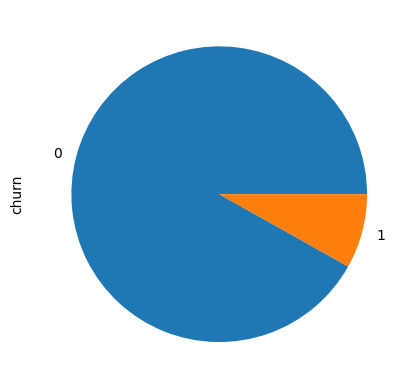

In [49]:
# Checking for churn/non churn percentage for data distribution
print((tc['churn'].value_counts()/len(tc))*100)
((tc['churn'].value_counts()/len(tc))*100).plot(kind="pie")
plt.show()

#### Since, 92% of the customers do not churn, So, this will lead to a case of class imbalance

**Delete columns that belong to the churn month**

**Since this variable `churn` is the target variable, all the columns relating to this variable(i.e. all columns with suffix `_9`) can be dropped form the DataFrame. <br>Since, we have used it to derive the target column, if we use it to train the Machine Learning model. Then, our machine learning model will overfit the month 9 (semptember) data**

In [50]:
# Selecting all the churn columns

churn_phase_cols = [col for col in tc.columns if '_9' in col]
print("The columns from churn phase are:\n",churn_phase_cols)

The columns from churn phase are:
 ['arpu_9', 'onnet_mou_9', 'offnet_mou_9', 'roam_ic_mou_9', 'roam_og_mou_9', 'loc_og_t2t_mou_9', 'loc_og_t2m_mou_9', 'loc_og_t2f_mou_9', 'loc_og_t2c_mou_9', 'loc_og_mou_9', 'std_og_t2t_mou_9', 'std_og_t2m_mou_9', 'std_og_t2f_mou_9', 'std_og_mou_9', 'isd_og_mou_9', 'spl_og_mou_9', 'og_others_9', 'total_og_mou_9', 'loc_ic_t2t_mou_9', 'loc_ic_t2m_mou_9', 'loc_ic_t2f_mou_9', 'loc_ic_mou_9', 'std_ic_t2t_mou_9', 'std_ic_t2m_mou_9', 'std_ic_t2f_mou_9', 'std_ic_mou_9', 'total_ic_mou_9', 'spl_ic_mou_9', 'isd_ic_mou_9', 'ic_others_9', 'total_rech_num_9', 'total_rech_amt_9', 'max_rech_amt_9', 'last_day_rch_amt_9', 'total_rech_data_9', 'max_rech_data_9', 'av_rech_amt_data_9', 'vol_2g_mb_9', 'vol_3g_mb_9', 'monthly_2g_9', 'sachet_2g_9', 'monthly_3g_9', 'sachet_3g_9']


In [51]:
# Dropping the selected churn columns
tc.drop(churn_phase_cols, axis=1, inplace=True)

# Checking new dimensions
tc.shape

(30001, 141)

In [52]:
# Dropping further unwanted columns
tc.drop(['total_rech_amt_data_6','av_rech_amt_data_6',
                   'total_rech_data_6','total_rech_amt_6',
                  'total_rech_amt_data_7','av_rech_amt_data_7',
                   'total_rech_data_7','total_rech_amt_7'], axis=1, inplace=True)

<br>**Check for correlation of the indepedent variables and try to understand their dependencies.**<br>

In [53]:
# creating a list of column names for each month
mon_6_cols = [col for col in tc.columns if '_6' in col]
mon_7_cols = [col for col in tc.columns if '_7' in col]
mon_8_cols = [col for col in tc.columns if '_8' in col]

In [54]:
# Checking the correlation amongst the independent variables & drop the highly correlated variables
tc_corr = tc.corr()
tc_corr.loc[:,:] = np.tril(tc_corr, k=-1)
tc_corr = tc_corr.stack()
tc_corr
tc_corr[(tc_corr > 0.80) | (tc_corr < -0.80)].sort_values(ascending=False)

total_rech_amt_8    arpu_8                0.955351
isd_og_mou_8        isd_og_mou_7          0.943433
                    isd_og_mou_6          0.919641
isd_og_mou_7        isd_og_mou_6          0.916237
sachet_2g_8         total_rech_data_8     0.900629
total_ic_mou_6      loc_ic_mou_6          0.895099
total_ic_mou_8      loc_ic_mou_8          0.893072
total_ic_mou_7      loc_ic_mou_7          0.883070
std_og_t2t_mou_8    onnet_mou_8           0.860483
std_og_t2t_mou_7    onnet_mou_7           0.860275
std_og_t2t_mou_6    onnet_mou_6           0.859593
avg_rech_amt_6_7    overall_rech_amt_7    0.856275
std_og_t2m_mou_7    offnet_mou_7          0.854685
std_og_t2m_mou_8    offnet_mou_8          0.851049
total_og_mou_8      std_og_mou_8          0.848858
total_og_mou_7      std_og_mou_7          0.848825
loc_ic_mou_8        loc_ic_t2m_mou_8      0.847512
std_ic_mou_8        std_ic_t2m_mou_8      0.845590
loc_ic_mou_6        loc_ic_t2m_mou_6      0.844418
loc_og_mou_8        loc_og_mou_

In [55]:
col_to_drop=['total_rech_amt_8','isd_og_mou_8','isd_og_mou_7','sachet_2g_8','total_ic_mou_6',
            'total_ic_mou_8','total_ic_mou_7','std_og_t2t_mou_6','std_og_t2t_mou_8','std_og_t2t_mou_7',
            'std_og_t2m_mou_7','std_og_t2m_mou_8',]

# These columns can be dropped as they are highly collinear with other predictor variables.
# Setting criteria collinearity as 85%

#  dropping these column
tc.drop(col_to_drop, axis=1, inplace=True)

In [56]:
# Checking new dimensions
tc.shape

(30001, 121)

### 4.Data Preparation

#### Deriving New Variables

In [57]:
# We have a column called 'aon'

# we can derive new variables from this to explain the data w.r.t churn.

# creating a new variable 'tenure'
tc['tenure'] = (tc['aon']/30).round(0)

# Since we derived a new column from 'aon', we can drop it
tc.drop('aon',axis=1, inplace=True)

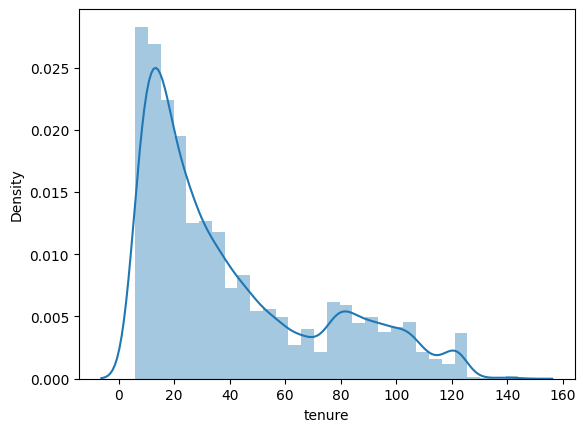

In [58]:
# Checking the distribution of he tenure variable

sns.distplot(tc['tenure'],bins=30)
plt.show()

In [59]:
# Bucketing Data
tn_range = [0, 6, 12, 24, 60, 61]
tn_label = [ '0-6 Months', '6-12 Months', '1-2 Yrs', '2-5 Yrs', '5 Yrs and above']
tc['tenure_range'] = pd.cut(tc['tenure'], tn_range, labels=tn_label)
tc['tenure_range'].head()

0     2-5 Yrs    
7     2-5 Yrs    
8     6-12 Months
21    1-2 Yrs    
23    1-2 Yrs    
Name: tenure_range, dtype: category
Categories (5, object): ['0-6 Months' < '6-12 Months' < '1-2 Yrs' < '2-5 Yrs' < '5 Yrs and above']

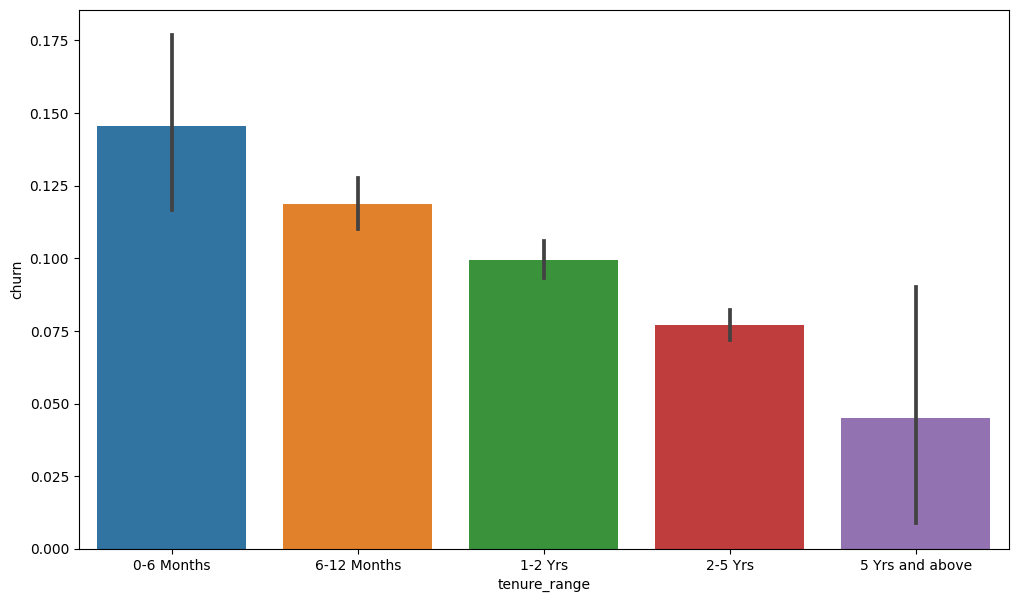

In [60]:
# Plotting a bar plot for tenure range
plt.figure(figsize=[12,7])
sns.barplot(x='tenure_range',y='churn', data=tc)
plt.show()

**Here it can be seen that the maximum churn rate happens within 0-6 month, but it gradually decreases as the tenure of customer increases.**

The average revenue per user is good customer is given by arpu_6 and arpu_7. since we have two seperate averages, hence take an average to these two and drop the other columns.

In [61]:
tc["avg_arpu_6_7"]= (tc['arpu_6']+tc['arpu_7'])/2
tc['avg_arpu_6_7'].head()

0     206.1005 
7     1209.5150
8     435.4720 
21    556.1030 
23    134.1235 
Name: avg_arpu_6_7, dtype: float64

In [62]:
#Dropping the original column
tc.drop(['arpu_6','arpu_7'], axis=1, inplace=True)

# Checking new shape
tc.shape

(30001, 121)

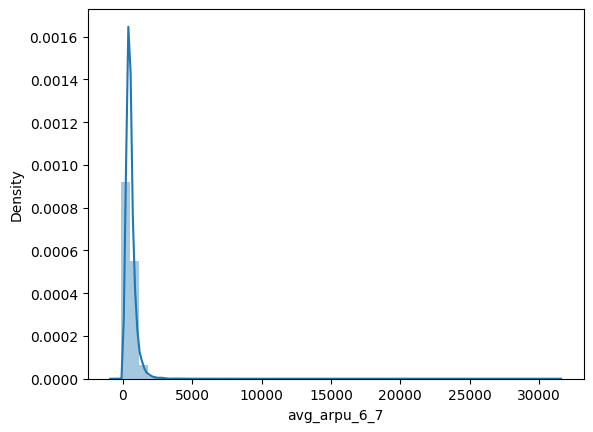

In [63]:
# Visualizing the column created
sns.distplot(tc['avg_arpu_6_7'])
plt.show()

Text(0.5, 1.0, 'Features Correlating with Churn variable')

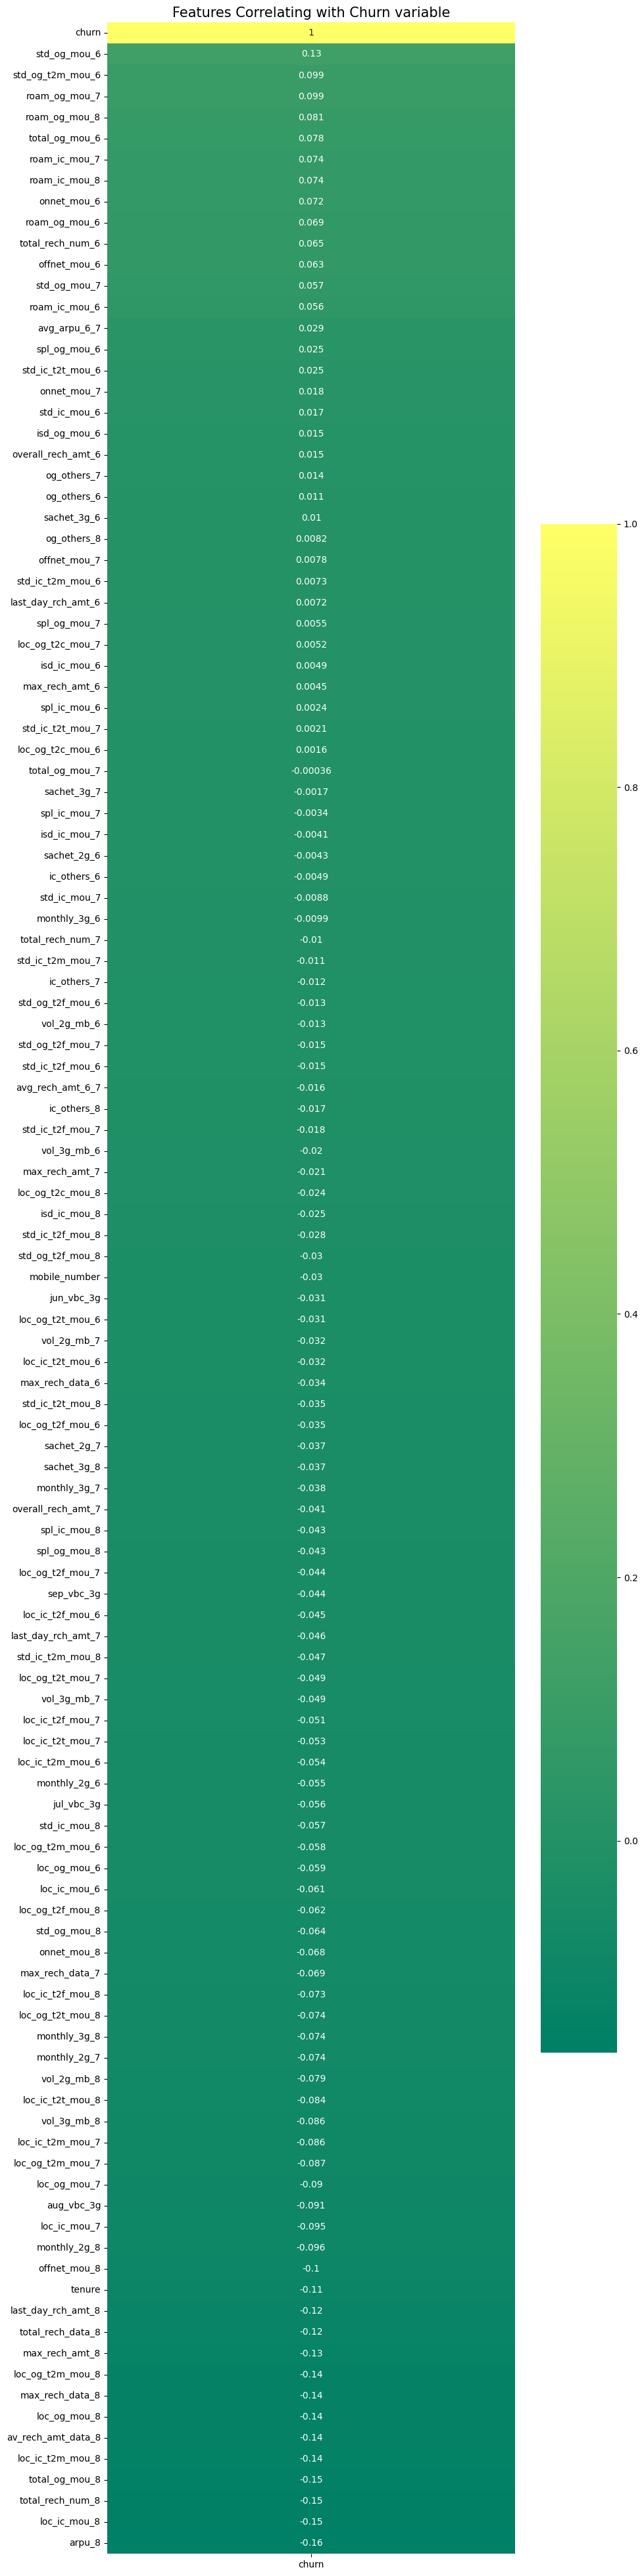

In [64]:
# Checking Correlation between target variable(SalePrice) with the other variable in the DataFrame
plt.figure(figsize=(10,50))
heatmap_churn = sns.heatmap(tc.corr()[['churn']].sort_values(ascending=False, by='churn'),annot=True, 
                                cmap='summer')
heatmap_churn.set_title("Features Correlating with Churn variable", fontsize=15)

- Avg Outgoing Calls & calls on romaning for 6 & 7th months are positively correlated with churn.
- Avg Revenue, No. Of Recharge for 8th month has negative correlation with churn.

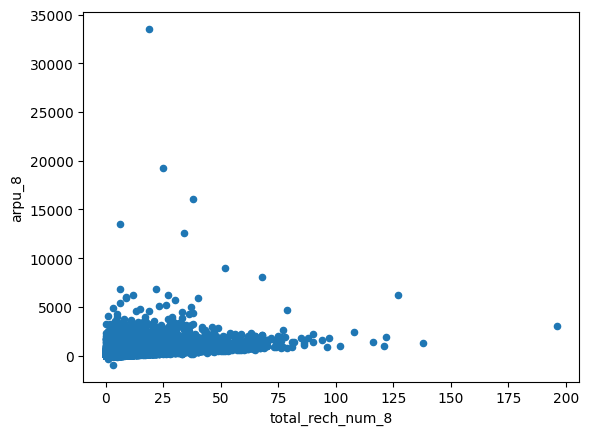

In [65]:
# Ploting a scatter plot between total recharge and avg revenue for the 8th month
tc[['total_rech_num_8', 'arpu_8']].plot.scatter(x = 'total_rech_num_8', y='arpu_8')
plt.show()

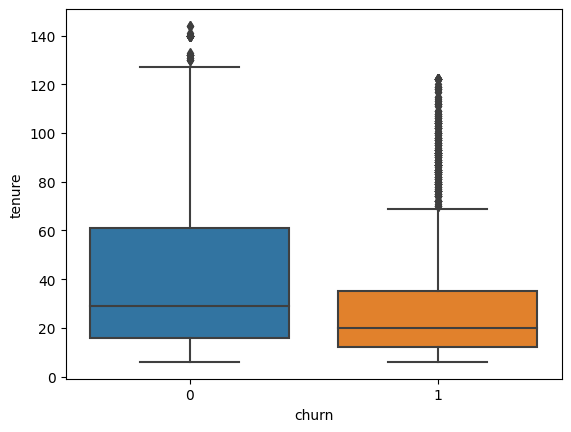

In [66]:
sns.boxplot(x = tc.churn, y = tc.tenure)

plt.show()

**From the above plot , its clear long tenure customers do no churn**

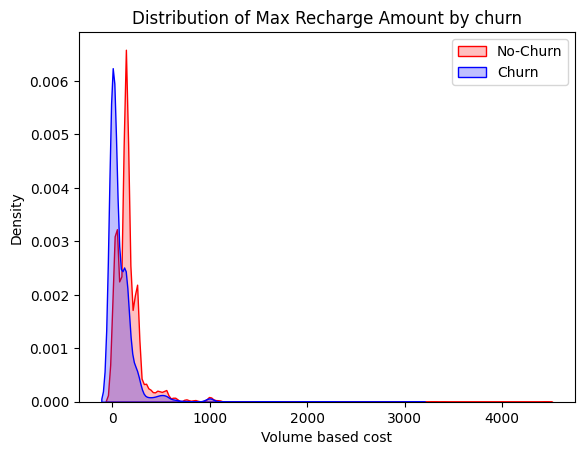

In [67]:
# Plot between churn vs max rechare amount
ax = sns.kdeplot(tc.max_rech_amt_8[(tc["churn"] == 0)],
                color="Red", shade = True)
ax = sns.kdeplot(tc.max_rech_amt_8[(tc["churn"] == 1)],
                ax =ax, color="Blue", shade= True)
ax.legend(["No-Churn","Churn"],loc='upper right')
ax.set_ylabel('Density')
ax.set_xlabel('Volume based cost')
ax.set_title('Distribution of Max Recharge Amount by churn')
plt.show()

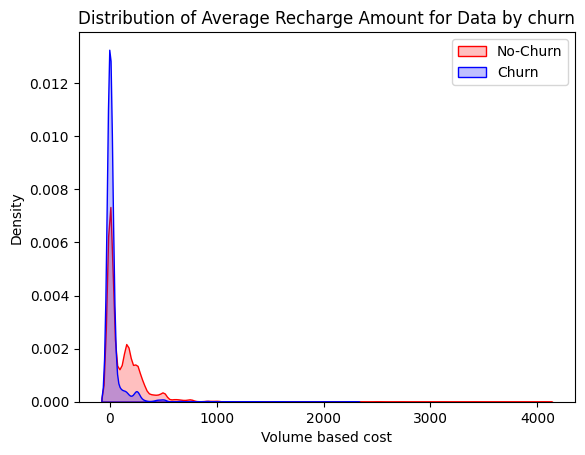

In [68]:
# churn vs max recharge amount
ax = sns.kdeplot(tc.av_rech_amt_data_8[(tc["churn"] == 0)],
                color="Red", shade = True)
ax = sns.kdeplot(tc.av_rech_amt_data_8[(tc["churn"] == 1)],
                ax =ax, color="Blue", shade= True)
ax.legend(["No-Churn","Churn"],loc='upper right')
ax.set_ylabel('Density')
ax.set_xlabel('Volume based cost')
ax.set_title('Distribution of Average Recharge Amount for Data by churn')
plt.show()

In [69]:
# Creating categories for month 8 column totalrecharge and their count
tc['total_rech_data_group_8']=pd.cut(tc['total_rech_data_8'],[-1,0,10,25,100],labels=["No_Recharge","<=10_Recharges","10-25_Recharges",">25_Recharges"])
tc['total_rech_num_group_8']=pd.cut(tc['total_rech_num_8'],[-1,0,10,25,1000],labels=["No_Recharge","<=10_Recharges","10-25_Recharges",">25_Recharges"])

					Distribution of total_rech_data_8 variable
 <=10_Recharges     15307
No_Recharge        14048
10-25_Recharges    608  
>25_Recharges      38   
Name: total_rech_data_group_8, dtype: int64


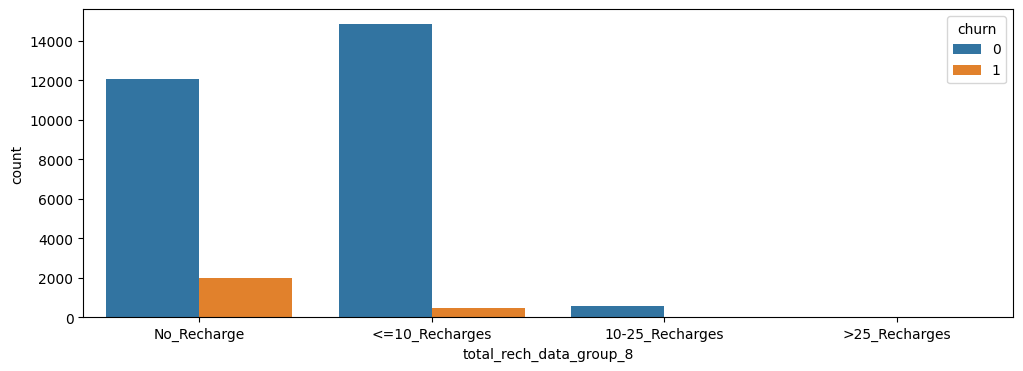

					Distribution of total_rech_num_8 variable
 <=10_Recharges     19349
10-25_Recharges    8073 
>25_Recharges      1996 
No_Recharge        583  
Name: total_rech_num_group_8, dtype: int64


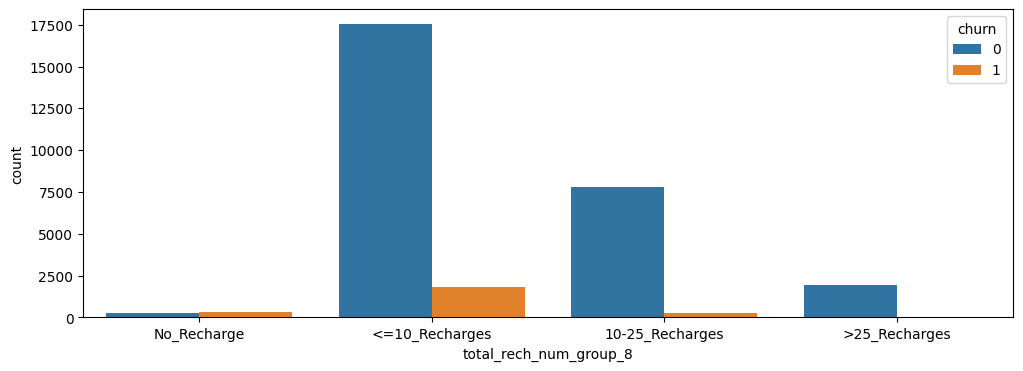

In [70]:
# Plotting the results

plt.figure(figsize=[12,4])
sns.countplot(data=tc,x="total_rech_data_group_8",hue="churn")
print("\t\t\t\t\tDistribution of total_rech_data_8 variable\n",tc['total_rech_data_group_8'].value_counts())
plt.show()
plt.figure(figsize=[12,4])
sns.countplot(data=tc,x="total_rech_num_group_8",hue="churn")
print("\t\t\t\t\tDistribution of total_rech_num_8 variable\n",tc['total_rech_num_group_8'].value_counts())
plt.show()

### 5.Data Modeling

In [71]:
# Creating a dummy variable for some of the categorical variables and dropping the first one.
dummy = pd.get_dummies(tc[['total_rech_data_group_8','total_rech_num_group_8','tenure_range']], drop_first=True)
dummy.head()

,total_rech_data_group_8_<=10_Recharges,total_rech_data_group_8_10-25_Recharges,total_rech_data_group_8_>25_Recharges,total_rech_num_group_8_<=10_Recharges,total_rech_num_group_8_10-25_Recharges,total_rech_num_group_8_>25_Recharges,tenure_range_6-12 Months,tenure_range_1-2 Yrs,tenure_range_2-5 Yrs,tenure_range_5 Yrs and above
0,1,0,0,1,0,0,0,0,1,0
7,0,0,0,1,0,0,0,0,1,0
8,1,0,0,0,1,0,1,0,0,0
21,0,0,0,0,0,1,0,1,0,0
23,1,0,0,1,0,0,0,1,0,0


In [72]:
# Adding the results to the master dataframe
tc = pd.concat([tc, dummy], axis=1)
tc.head()

,mobile_number,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2m_mou_6,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,total_rech_data_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,av_rech_amt_data_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,overall_rech_amt_6,overall_rech_amt_7,avg_rech_amt_6_7,churn,tenure,tenure_range,avg_arpu_6_7,total_rech_data_group_8,total_rech_num_group_8,total_rech_data_group_8_<=10_Recharges,total_rech_data_group_8_10-25_Recharges,total_rech_data_group_8_>25_Recharges,total_rech_num_group_8_<=10_Recharges,total_rech_num_group_8_10-25_Recharges,total_rech_num_group_8_>25_Recharges,tenure_range_6-12 Months,tenure_range_1-2 Yrs,tenure_range_2-5 Yrs,tenure_range_5 Yrs and above
0,7.000843e+09,213.803,53.27,24.613333,0.00,84.23,23.993333,0.00,0.00,0.00,0.00,0.00,0.00,0.00,53.27,24.613333,0.00,79.27,18.196667,0.00,0.403333,4.813333,0.00,0.353333,0.0,0.00,132.953333,47.636667,0.00,0.41,0.00,0.00,0.00,0.41,0.976667,0.00,0.0,4.14,0.326667,0.00,0.0,0.0,0.0,0.00,0.00,0.00,44.493333,13.396667,0.16,69.183333,62.85,4.13,17.74,22.503333,1.15,131.433333,98.76,5.44,0.00,3.366667,0.00,0.583333,0.37,0.00,1.243333,1.113333,0.00,1.826667,4.853333,0.00,0.043333,0.0,0.0,0.00,0.00,0.00,0.00,0.55,0.00,4.0,3.0,2.0,252.0,252.0,252.0,252.0,252.0,252.0,1.0,252.0,252.0,252.0,252.0,30.13,1.32,5.75,83.57,150.76,109.61,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,30.40,0.00,101.20,3.58,614.0,504.0,559.0,1,32.0,2-5 Yrs,206.1005,<=10_Recharges,<=10_Recharges,1,0,0,1,0,0,0,0,1,0
7,7.000702e+09,3171.480,57.84,54.680000,52.29,453.43,567.160000,325.91,16.23,33.49,31.64,23.74,12.59,38.06,51.39,31.380000,40.28,308.63,447.380000,162.28,62.130000,55.140000,53.23,0.000000,0.0,0.00,422.160000,533.910000,255.79,49.89,6.66,20.08,16.68,60.86,75.140000,77.84,0.0,4.50,0.000000,6.50,0.0,0.0,0.0,487.53,609.24,350.16,58.140000,32.260000,27.31,217.560000,221.49,121.19,152.16,101.460000,39.53,427.880000,355.23,188.04,36.89,11.830000,30.39,91.440000,126.99,141.33,52.190000,34.240000,22.21,180.540000,173.080000,193.94,0.210000,0.0,0.0,2.06,14.53,31.59,15.74,15.19,15.14,5.0,5.0,7.0,1580.0,790.0,1580.0,0.0,0.0,779.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,57.74,19.38,18.74,0.00,1580.0,790.0,1185.0,1,27.0,2-5 Yrs,1209.5150,No_Recharge,<=10_Recharges,0,0,0,1,0,0,0,0,1,0
8,7.001525e+09,137.362,413.69,351.030000,35.08,94.66,80.630000,136.48,0.00,0.00,0.00,0.00,0.00,0.00,297.13,217.590000,12.49,80.96,70.580000,50.54,0.000000,0.000000,0.00,0.000000,0.0,7.15,378.090000,288.180000,63.04,13.69,0.00,0.00,0.00,130.26,143.480000,98.2

In [73]:
# Creating a copy of the filtered dataframe

df=tc[:].copy()

# Dropping unwanted columns
df.drop(['tenure_range','mobile_number','total_rech_data_group_8','total_rech_num_group_8','sep_vbc_3g','tenure'], axis=1, inplace=True)

In [74]:
# Checking the head of the DataFrame
df.head()

,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2m_mou_6,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,total_rech_data_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,av_rech_amt_data_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,overall_rech_amt_6,overall_rech_amt_7,avg_rech_amt_6_7,churn,avg_arpu_6_7,total_rech_data_group_8_<=10_Recharges,total_rech_data_group_8_10-25_Recharges,total_rech_data_group_8_>25_Recharges,total_rech_num_group_8_<=10_Recharges,total_rech_num_group_8_10-25_Recharges,total_rech_num_group_8_>25_Recharges,tenure_range_6-12 Months,tenure_range_1-2 Yrs,tenure_range_2-5 Yrs,tenure_range_5 Yrs and above
0,213.803,53.27,24.613333,0.00,84.23,23.993333,0.00,0.00,0.00,0.00,0.00,0.00,0.00,53.27,24.613333,0.00,79.27,18.196667,0.00,0.403333,4.813333,0.00,0.353333,0.0,0.00,132.953333,47.636667,0.00,0.41,0.00,0.00,0.00,0.41,0.976667,0.00,0.0,4.14,0.326667,0.00,0.0,0.0,0.0,0.00,0.00,0.00,44.493333,13.396667,0.16,69.183333,62.85,4.13,17.74,22.503333,1.15,131.433333,98.76,5.44,0.00,3.366667,0.00,0.583333,0.37,0.00,1.243333,1.113333,0.00,1.826667,4.853333,0.00,0.043333,0.0,0.0,0.00,0.00,0.00,0.00,0.55,0.00,4.0,3.0,2.0,252.0,252.0,252.0,252.0,252.0,252.0,1.0,252.0,252.0,252.0,252.0,30.13,1.32,5.75,83.57,150.76,109.61,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,30.40,0.00,101.20,614.0,504.0,559.0,1,206.1005,1,0,0,1,0,0,0,0,1,0
7,3171.480,57.84,54.680000,52.29,453.43,567.160000,325.91,16.23,33.49,31.64,23.74,12.59,38.06,51.39,31.380000,40.28,308.63,447.380000,162.28,62.130000,55.140000,53.23,0.000000,0.0,0.00,422.160000,533.910000,255.79,49.89,6.66,20.08,16.68,60.86,75.140000,77.84,0.0,4.50,0.000000,6.50,0.0,0.0,0.0,487.53,609.24,350.16,58.140000,32.260000,27.31,217.560000,221.49,121.19,152.16,101.460000,39.53,427.880000,355.23,188.04,36.89,11.830000,30.39,91.440000,126.99,141.33,52.190000,34.240000,22.21,180.540000,173.080000,193.94,0.210000,0.0,0.0,2.06,14.53,31.59,15.74,15.19,15.14,5.0,5.0,7.0,1580.0,790.0,1580.0,0.0,0.0,779.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,57.74,19.38,18.74,1580.0,790.0,1185.0,1,1209.5150,0,0,0,1,0,0,0,0,1,0
8,137.362,413.69,351.030000,35.08,94.66,80.630000,136.48,0.00,0.00,0.00,0.00,0.00,0.00,297.13,217.590000,12.49,80.96,70.580000,50.54,0.000000,0.000000,0.00,0.000000,0.0,7.15,378.090000,288.180000,63.04,13.69,0.00,0.00,0.00,130.26,143.480000,98.28,0.0,0.00,0.000000,10.23,0.0,0.0,0.0,508.36,431.66,171.56,23.840000,9.840000,0.31,57.580000,13.98,15.48,0.00,0.000000,0.00,81.430000,23.83,15.79,0.00,0.580000,0.10,22.430000,4.08,0.65,0.000000,0.000000,0.00,22.430000,4.6600

In [75]:
# Creating X DataFrame for model building.
X = df.drop(['churn'],axis=1)

In [76]:
X.head()

,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2m_mou_6,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,total_rech_data_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,av_rech_amt_data_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,overall_rech_amt_6,overall_rech_amt_7,avg_rech_amt_6_7,avg_arpu_6_7,total_rech_data_group_8_<=10_Recharges,total_rech_data_group_8_10-25_Recharges,total_rech_data_group_8_>25_Recharges,total_rech_num_group_8_<=10_Recharges,total_rech_num_group_8_10-25_Recharges,total_rech_num_group_8_>25_Recharges,tenure_range_6-12 Months,tenure_range_1-2 Yrs,tenure_range_2-5 Yrs,tenure_range_5 Yrs and above
0,213.803,53.27,24.613333,0.00,84.23,23.993333,0.00,0.00,0.00,0.00,0.00,0.00,0.00,53.27,24.613333,0.00,79.27,18.196667,0.00,0.403333,4.813333,0.00,0.353333,0.0,0.00,132.953333,47.636667,0.00,0.41,0.00,0.00,0.00,0.41,0.976667,0.00,0.0,4.14,0.326667,0.00,0.0,0.0,0.0,0.00,0.00,0.00,44.493333,13.396667,0.16,69.183333,62.85,4.13,17.74,22.503333,1.15,131.433333,98.76,5.44,0.00,3.366667,0.00,0.583333,0.37,0.00,1.243333,1.113333,0.00,1.826667,4.853333,0.00,0.043333,0.0,0.0,0.00,0.00,0.00,0.00,0.55,0.00,4.0,3.0,2.0,252.0,252.0,252.0,252.0,252.0,252.0,1.0,252.0,252.0,252.0,252.0,30.13,1.32,5.75,83.57,150.76,109.61,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,30.40,0.00,101.20,614.0,504.0,559.0,206.1005,1,0,0,1,0,0,0,0,1,0
7,3171.480,57.84,54.680000,52.29,453.43,567.160000,325.91,16.23,33.49,31.64,23.74,12.59,38.06,51.39,31.380000,40.28,308.63,447.380000,162.28,62.130000,55.140000,53.23,0.000000,0.0,0.00,422.160000,533.910000,255.79,49.89,6.66,20.08,16.68,60.86,75.140000,77.84,0.0,4.50,0.000000,6.50,0.0,0.0,0.0,487.53,609.24,350.16,58.140000,32.260000,27.31,217.560000,221.49,121.19,152.16,101.460000,39.53,427.880000,355.23,188.04,36.89,11.830000,30.39,91.440000,126.99,141.33,52.190000,34.240000,22.21,180.540000,173.080000,193.94,0.210000,0.0,0.0,2.06,14.53,31.59,15.74,15.19,15.14,5.0,5.0,7.0,1580.0,790.0,1580.0,0.0,0.0,779.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,57.74,19.38,18.74,1580.0,790.0,1185.0,1209.5150,0,0,0,1,0,0,0,0,1,0
8,137.362,413.69,351.030000,35.08,94.66,80.630000,136.48,0.00,0.00,0.00,0.00,0.00,0.00,297.13,217.590000,12.49,80.96,70.580000,50.54,0.000000,0.000000,0.00,0.000000,0.0,7.15,378.090000,288.180000,63.04,13.69,0.00,0.00,0.00,130.26,143.480000,98.28,0.0,0.00,0.000000,10.23,0.0,0.0,0.0,508.36,431.66,171.56,23.840000,9.840000,0.31,57.580000,13.98,15.48,0.00,0.000000,0.00,81.430000,23.83,15.79,0.00,0.580000,0.10,22.430000,4.08,0.65,0.000000,0.000000,0.00,22.430000,4.660000,0.75,0.

In [77]:
# lets create y DataFrame for model building.
y=df['churn']
y.head()

0     1
7     1
8     0
21    0
23    0
Name: churn, dtype: int32

In [78]:
# split the dateset into train and test DataFrame
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, train_size=0.7, random_state=1)
print("Dimension of X_train:", X_train.shape)
print("Dimension of X_test:", X_test.shape)

Dimension of X_train: (21000, 126)
Dimension of X_test: (9001, 126)


Text(0.5, 1.0, 'churned')

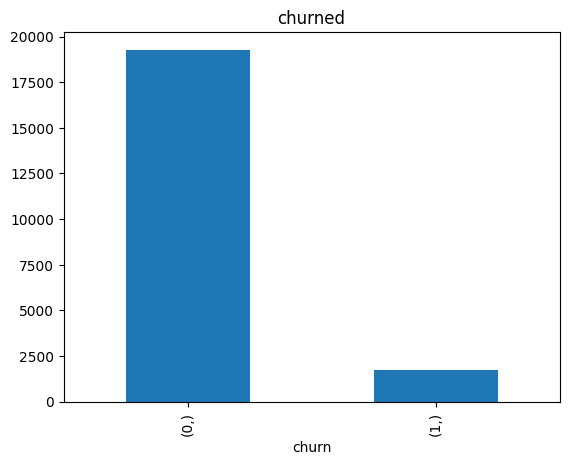

In [79]:
# Visualizing the  counts of unique rows in the y_train of the DataFrame

pd.DataFrame(y_train).value_counts().plot(kind ='bar').set_title('churned')

In [80]:
# Printing DataFrame information 
X_train.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21000 entries, 15709 to 99093
Data columns (total 126 columns):
 #    Column                                   Dtype  
---   ------                                   -----  
 0    arpu_8                                   float64
 1    onnet_mou_6                              float64
 2    onnet_mou_7                              float64
 3    onnet_mou_8                              float64
 4    offnet_mou_6                             float64
 5    offnet_mou_7                             float64
 6    offnet_mou_8                             float64
 7    roam_ic_mou_6                            float64
 8    roam_ic_mou_7                            float64
 9    roam_ic_mou_8                            float64
 10   roam_og_mou_6                            float64
 11   roam_og_mou_7                            float64
 12   roam_og_mou_8                            float64
 13   loc_og_t2t_mou_6                         float64
 14   

In [81]:
num_col = X_train.select_dtypes(include = ['int64','float64']).columns.tolist()

In [82]:
# apply scaling on the DataFrame
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
X_train[num_col] = scaler.fit_transform(X_train[num_col])

In [83]:
X_train.head()

,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2m_mou_6,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,total_rech_data_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,av_rech_amt_data_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,overall_rech_amt_6,overall_rech_amt_7,avg_rech_amt_6_7,avg_arpu_6_7,total_rech_data_group_8_<=10_Recharges,total_rech_data_group_8_10-25_Recharges,total_rech_data_group_8_>25_Recharges,total_rech_num_group_8_<=10_Recharges,total_rech_num_group_8_10-25_Recharges,total_rech_num_group_8_>25_Recharges,tenure_range_6-12 Months,tenure_range_1-2 Yrs,tenure_range_2-5 Yrs,tenure_range_5 Yrs and above
15709,0.038904,0.000235,0.000531,0.000238,0.004211,0.003651,0.004095,0.0,0.000000,0.0,0.0,0.00000,0.0,0.000269,0.000585,0.000238,0.007005,0.006330,0.015246,0.003075,0.000000,0.000980,0.000000,0.010426,0.006708,0.003471,0.004240,0.005214,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.006292,0.002472,0.000000,0.0,0.0,0.003461,0.003487,0.004268,0.004415,0.005650,0.012348,0.014898,0.012389,0.018297,0.001078,0.003333,0.000000,0.013386,0.014004,0.024154,0.000000,0.000000,0.000000,0.001320,0.000000,0.000000,0.0,0.00000,0.0,0.001119,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.009772,0.050725,0.015306,0.038404,0.038404,0.034615,0.038404,0.038404,0.034615,0.017544,0.099035,0.099035,0.099035,0.037922,0.003367,0.026477,0.021871,0.000000,0.000000,0.000000,0.25,0.25,0.2,0.000000,0.041667,0.0,0.000000,0.0000,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.003420,0.015354,0.002411,0.063393,1,0,0,1,0,0,0,0,0,0
28202,0.032921,0.000493,0.000000,0.000000,0.001631,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.00000,0.0,0.000566,0.000000,0.000000,0.002533,0.000000,0.000000,0.002454,0.000000,0.000000,0.000000,0.000000,0.000000,0.001624,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.001620,0.000000,0.000000,0.013088,0.007020,0.003657,0.041620,0.021697,0.014587,0.013215,0.008694,0.000000,0.040335,0.022862,0.014662,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.00209,0.0,0.000000,0.000316,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.055375,0.108696,0.040816,0.009227,0.009227,0.008316,0.009227,0.005985,0.005619,0.105263,0.016077,0.016077,0.016077,0.034967,0.064367,0.045634,0.035909,0.000332,0.000000,0.000000,0.00,0.00,0.0,0.166667,0.083333,0.0,0.000000,0.0000,0.0,0.057143,0.0,0.000000,0.000000,0.0,0.009431,0.020687,0.010484,0.068877,1,0,0,1,0,0,0,0,1,0
14943,0.033826,0.000876,0.000275,0.00071

#### Handling Class Imbalance

**Using SMOTE method, we can balance the data w.r.t. churn variable and proceed further**

In [84]:
## !pip install imbalanced-learn

In [85]:
from imblearn.over_sampling import SMOTE

sm = SMOTE(random_state=42)
X_train_sm,y_train_sm = sm.fit_resample(X_train,y_train)

In [86]:
print("Dimension of X_train_sm Shape:", X_train_sm.shape)
print("Dimension of y_train_sm Shape:", y_train_sm.shape)

Dimension of X_train_sm Shape: (38576, 126)
Dimension of y_train_sm Shape: (38576,)


Text(0.5, 1.0, 'churned')

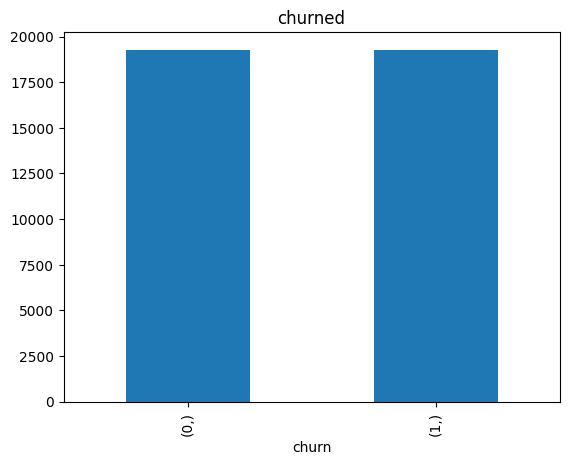

In [87]:
# Visualizing the  counts of unique rows in the y_train_sm of the DataFrame

pd.DataFrame(y_train_sm).value_counts().plot(kind ='bar').set_title('churned')

##### From the above Graph it is clear that the problem of class imbalance has been resolved in y_train_sm

### 6.Logistic Regression

In [88]:
# Importing necessary libraries for Model creation
import statsmodels.api as sm

In [89]:
# Logistic regression model
logm1 = sm.GLM(y_train_sm,(sm.add_constant(X_train_sm)), family = sm.families.Binomial())
logm1.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  churn   No. Observations:                38576
Model:                            GLM   Df Residuals:                    38450
Model Family:                Binomial   Df Model:                          125
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -13899.
Date:                Mon, 17 Apr 2023   Deviance:                       27799.
Time:                        10:31:50   Pearson chi2:                 2.47e+14
No. Iterations:                   100   Pseudo R-squ. (CS):             0.4861
Covariance Type:            nonrobust                                         
===========================================================================================================
                                              coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------
const                                       1.0696      0.152      7.048      0.000       0.772       1.367
arpu_8                                      4.7856      1.723      2.777      0.005       1.408       8.163
onnet_mou_6                               -51.0285     28.723     -1.777      0.076    -107.324       5.267
onnet_mou_7                                58.2210     16.330      3.565      0.000      26.215      90.227
onnet_mou_8                               181.4643     24.155      7.513      0.000     134.122     228.807
offnet_mou_6                              -47.8874     32.383     -1.479      0.139    -111.358      15.583
offnet_mou_7                               71.5233     19.308      3.704      0.000      33.680     109.367
offnet_mou_8                              232.4309     31.430      7.395      0.000     170.829     294.032
roam_ic_mou_6                               3.0054      0.846      3.554      0.000       1.348       4.663
roam_ic_mou_7                               5.1800      1.572      3.295      0.001       2.099       8.262
roam_ic_mou_8                              -1.5652      0.802     -1.952      0.051      -3.136       0.006
roam_og_mou_6                              21.8398     14.676      1.488      0.137      -6.924      50.603
roam_og_mou_7                             -12.2597      3.827     -3.203      0.001     -19.761      -4.759
roam_og_mou_8                             -55.8880      7.814     -7.152      0.000     -71.204     -40.572
loc_og_t2t_mou_6                        -6948.9995   1.98e+04     -0.352      0.725   -4.57e+04    3.18e+04
loc_og_t2t_mou_7                        -1.823e+04   2.28e+04     -0.800      0.424   -6.29e+04    2.64e+04
loc_og_t2t_mou_8                          1.93e+05   3.41e+04      5.662      0.000    1.26e+05     2.6e+05
loc_og_t2m_mou_6                        -5118.4835   1.45e+04     -0.352      0.725   -3.36e+04    2.34e+04
loc_og_t2m_mou_7                        -1.099e+04   1.37e+04     -0.800      0.424   -3.79e+04    1.59e+04
loc_og_t2m_mou_8                         6.367e+04   1.12e+04      5.662      0.000    4.16e+04    8.57e+04
loc_og_t2f_mou_6                         -729.5972   2078.323     -0.351      0.726   -4803.036    3343.841
loc_og_t2f_mou_7                        -2621.4667   3259.191     -0.804      0.421   -9009.363    3766.430
loc_og_t2f_mou_8                         1.667e+04   2943.441      5.664      0.000    1.09e+04    2.24e+04
loc_og_t2c_mou_6                           -5.0019      1.068     -4.685      0.000      -7.094      -2.909
loc_og_t2c_mou_7                            0.2131      1.864      0.114      0.909      -3.440       3.866
loc_og_t2c_mou_8                            0.3722      1.2

#### Logistic Regression using Feature Selection (RFE method)

In [90]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()

from sklearn.feature_selection import RFE

# running RFE with 20 variables as output
# changed it here
# considering for all the 
rfe = RFE(logreg, n_features_to_select=20)             
rfe = rfe.fit(X_train_sm, y_train_sm)

In [91]:
rfe.support_

array([ True, False, False, False, False, False, False, False,  True,
       False, False, False,  True, False, False, False, False, False,
        True, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False,  True, False, False,
       False, False, False, False, False, False, False, False,  True,
       False, False,  True, False, False,  True, False, False, False,
        True, False,  True, False, False, False, False, False, False,
       False, False, False, False, False,  True, False, False,  True,
       False, False, False, False, False, False, False, False,  True,
       False, False, False, False, False,  True,  True, False, False,
       False,  True, False, False,  True, False, False, False, False,
       False,  True, False, False, False, False, False, False, False,
       False,  True, False, False, False, False, False,  True, False,
       False, False, False, False, False, False, False, False, False])

In [92]:
rfe_columns=X_train_sm.columns[rfe.support_]
print("The selected columns by RFE for modelling are: \n\n",rfe_columns)

The selected columns by RFE for modelling are: 

 Index(['arpu_8', 'roam_ic_mou_7', 'roam_og_mou_8', 'loc_og_t2m_mou_8',
       'std_og_mou_7', 'total_og_mou_8', 'loc_ic_t2t_mou_8',
       'loc_ic_t2m_mou_8', 'loc_ic_mou_6', 'loc_ic_mou_8', 'std_ic_mou_8',
       'spl_ic_mou_8', 'total_rech_num_8', 'last_day_rch_amt_8',
       'total_rech_data_8', 'av_rech_amt_data_8', 'vol_2g_mb_8',
       'monthly_2g_8', 'aug_vbc_3g', 'avg_arpu_6_7'],
      dtype='object')


In [93]:
list(zip(X_train_sm.columns, rfe.support_, rfe.ranking_))

[('arpu_8', True, 1),
 ('onnet_mou_6', False, 22),
 ('onnet_mou_7', False, 37),
 ('onnet_mou_8', False, 49),
 ('offnet_mou_6', False, 35),
 ('offnet_mou_7', False, 21),
 ('offnet_mou_8', False, 26),
 ('roam_ic_mou_6', False, 13),
 ('roam_ic_mou_7', True, 1),
 ('roam_ic_mou_8', False, 60),
 ('roam_og_mou_6', False, 69),
 ('roam_og_mou_7', False, 33),
 ('roam_og_mou_8', True, 1),
 ('loc_og_t2t_mou_6', False, 65),
 ('loc_og_t2t_mou_7', False, 99),
 ('loc_og_t2t_mou_8', False, 19),
 ('loc_og_t2m_mou_6', False, 67),
 ('loc_og_t2m_mou_7', False, 74),
 ('loc_og_t2m_mou_8', True, 1),
 ('loc_og_t2f_mou_6', False, 107),
 ('loc_og_t2f_mou_7', False, 5),
 ('loc_og_t2f_mou_8', False, 25),
 ('loc_og_t2c_mou_6', False, 7),
 ('loc_og_t2c_mou_7', False, 66),
 ('loc_og_t2c_mou_8', False, 104),
 ('loc_og_mou_6', False, 45),
 ('loc_og_mou_7', False, 105),
 ('loc_og_mou_8', False, 2),
 ('std_og_t2m_mou_6', False, 93),
 ('std_og_t2f_mou_6', False, 79),
 ('std_og_t2f_mou_7', False, 27),
 ('std_og_t2f_mou_8',

##### Assessing the model with StatsModels

In [94]:
X_train_SM = sm.add_constant(X_train_sm[rfe_columns])
logm2 = sm.GLM(y_train_sm,X_train_SM, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  churn   No. Observations:                38576
Model:                            GLM   Df Residuals:                    38555
Model Family:                Binomial   Df Model:                           20
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -15852.
Date:                Mon, 17 Apr 2023   Deviance:                       31703.
Time:                        10:33:30   Pearson chi2:                 8.44e+10
No. Iterations:                     7   Pseudo R-squ. (CS):             0.4313
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  0.5718      0.071      8.101      0.000       0.433       0.710
arpu_8                -7.4189      1.295     -5.730      0.000      -9.957      -4.881
roam_ic_mou_7          8.3147      0.929      8.948      0.000       6.493      10.136
roam_og_mou_8          4.3254      0.602      7.190      0.000       3.146       5.505
loc_og_t2m_mou_8      -3.8292      0.668     -5.731      0.000      -5.139      -2.520
std_og_mou_7           7.7463      0.513     15.114      0.000       6.742       8.751
total_og_mou_8       -20.2090      0.956    -21.143      0.000     -22.082     -18.336
loc_ic_t2t_mou_8       1.0280      4.078      0.252      0.801      -6.966       9.022
loc_ic_t2m_mou_8      -1.2611      4.448     -0.284      0.777      -9.978       7.456
loc_ic_mou_6           9.1611      0.723     12.666      0.000       7.743      10.579
loc_ic_mou_8         -31.0473      5.010     -6.197      0.000     -40.866     -21.228
std_ic_mou_8         -11.9357      1.359     -8.784      0.000     -14.599      -9.272
spl_ic_mou_8         -19.8516      1.375    -14.436      0.000     -22.547     -17.156
total_rech_num_8      -7.0996      0.533    -13.327      0.000      -8.144      -6.055
last_day_rch_amt_8   -18.3227      0.810    -22.610      0.000     -19.911     -16.734
total_rech_data_8     -8.9207      0.612    -14.580      0.000     -10.120      -7.721
av_rech_amt_data_8    -5.2450      0.644     -8.148      0.000      -6.507      -3.983
vol_2g_mb_8          -10.4892      0.934    -11.229      0.000     -12.320      -8.658
monthly_2g_8          -5.7717      0.360    -16.041      0.000      -6.477      -5.066
aug_vbc_3g            -6.8396      0.588    -11.633      0.000      -7.992      -5.687
avg_arpu_6_7          18.2676      1.089     16.781      0.000      16.134      20.401
======================================================================================
"""

In [95]:
# From the p-value of the individual columns, 
    # Drop the column 'loc_ic_t2t_mou_8' as it has high p-value of 0.80
rfe_columns_1=rfe_columns.drop('loc_ic_t2t_mou_8',1)
print("\nThe new set of edited featured are:\n",rfe_columns_1)


The new set of edited featured are:
 Index(['arpu_8', 'roam_ic_mou_7', 'roam_og_mou_8', 'loc_og_t2m_mou_8',
       'std_og_mou_7', 'total_og_mou_8', 'loc_ic_t2m_mou_8', 'loc_ic_mou_6',
       'loc_ic_mou_8', 'std_ic_mou_8', 'spl_ic_mou_8', 'total_rech_num_8',
       'last_day_rch_amt_8', 'total_rech_data_8', 'av_rech_amt_data_8',
       'vol_2g_mb_8', 'monthly_2g_8', 'aug_vbc_3g', 'avg_arpu_6_7'],
      dtype='object')


In [96]:
# Training the model with the edited feature list
X_train_SM = sm.add_constant(X_train_sm[rfe_columns_1])
logm2 = sm.GLM(y_train_sm,X_train_SM, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  churn   No. Observations:                38576
Model:                            GLM   Df Residuals:                    38556
Model Family:                Binomial   Df Model:                           19
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -15852.
Date:                Mon, 17 Apr 2023   Deviance:                       31703.
Time:                        10:33:31   Pearson chi2:                 8.49e+10
No. Iterations:                     7   Pseudo R-squ. (CS):             0.4313
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  0.5714      0.071      8.096      0.000       0.433       0.710
arpu_8                -7.4196      1.295     -5.730      0.000      -9.957      -4.882
roam_ic_mou_7          8.3174      0.929      8.950      0.000       6.496      10.139
roam_og_mou_8          4.3268      0.602      7.192      0.000       3.148       5.506
loc_og_t2m_mou_8      -3.8309      0.668     -5.734      0.000      -5.140      -2.521
std_og_mou_7           7.7428      0.512     15.114      0.000       6.739       8.747
total_og_mou_8       -20.2018      0.955    -21.146      0.000     -22.074     -18.329
loc_ic_t2m_mou_8      -2.2429      2.136     -1.050      0.294      -6.429       1.943
loc_ic_mou_6           9.1640      0.723     12.669      0.000       7.746      10.582
loc_ic_mou_8         -29.8843      1.933    -15.463      0.000     -33.672     -26.096
std_ic_mou_8         -11.9422      1.359     -8.789      0.000     -14.605      -9.279
spl_ic_mou_8         -19.8488      1.375    -14.435      0.000     -22.544     -17.154
total_rech_num_8      -7.0935      0.532    -13.330      0.000      -8.136      -6.051
last_day_rch_amt_8   -18.3273      0.810    -22.622      0.000     -19.915     -16.739
total_rech_data_8     -8.9222      0.612    -14.583      0.000     -10.121      -7.723
av_rech_amt_data_8    -5.2484      0.644     -8.155      0.000      -6.510      -3.987
vol_2g_mb_8          -10.4886      0.934    -11.228      0.000     -12.320      -8.658
monthly_2g_8          -5.7723      0.360    -16.043      0.000      -6.478      -5.067
aug_vbc_3g            -6.8433      0.588    -11.642      0.000      -7.995      -5.691
avg_arpu_6_7          18.2734      1.088     16.790      0.000      16.140      20.406
======================================================================================
"""

In [97]:
# From the p-value of the individual columns, 
    # Drop the column 'loc_ic_t2m_mou_8' as it has high p-value of 0.80
rfe_columns_2=rfe_columns_1.drop('loc_ic_t2m_mou_8',1)
print("\nThe new set of edited featured are:\n",rfe_columns_2)


The new set of edited featured are:
 Index(['arpu_8', 'roam_ic_mou_7', 'roam_og_mou_8', 'loc_og_t2m_mou_8',
       'std_og_mou_7', 'total_og_mou_8', 'loc_ic_mou_6', 'loc_ic_mou_8',
       'std_ic_mou_8', 'spl_ic_mou_8', 'total_rech_num_8',
       'last_day_rch_amt_8', 'total_rech_data_8', 'av_rech_amt_data_8',
       'vol_2g_mb_8', 'monthly_2g_8', 'aug_vbc_3g', 'avg_arpu_6_7'],
      dtype='object')


In [98]:
# Training the model with the edited feature list
X_train_SM = sm.add_constant(X_train_sm[rfe_columns_2])
logm2 = sm.GLM(y_train_sm,X_train_SM, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  churn   No. Observations:                38576
Model:                            GLM   Df Residuals:                    38557
Model Family:                Binomial   Df Model:                           18
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -15852.
Date:                Mon, 17 Apr 2023   Deviance:                       31704.
Time:                        10:33:31   Pearson chi2:                 8.51e+10
No. Iterations:                     7   Pseudo R-squ. (CS):             0.4313
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  0.5682      0.071      8.055      0.000       0.430       0.706
arpu_8                -7.3871      1.294     -5.709      0.000      -9.923      -4.851
roam_ic_mou_7          8.2919      0.930      8.919      0.000       6.470      10.114
roam_og_mou_8          4.3369      0.602      7.208      0.000       3.158       5.516
loc_og_t2m_mou_8      -3.9987      0.650     -6.156      0.000      -5.272      -2.725
std_og_mou_7           7.7052      0.511     15.082      0.000       6.704       8.707
total_og_mou_8       -20.1259      0.952    -21.139      0.000     -21.992     -18.260
loc_ic_mou_6           9.1605      0.724     12.652      0.000       7.741      10.580
loc_ic_mou_8         -31.5914      1.068    -29.592      0.000     -33.684     -29.499
std_ic_mou_8         -11.9423      1.359     -8.790      0.000     -14.605      -9.280
spl_ic_mou_8         -19.8518      1.375    -14.440      0.000     -22.546     -17.157
total_rech_num_8      -7.1243      0.531    -13.408      0.000      -8.166      -6.083
last_day_rch_amt_8   -18.3312      0.810    -22.622      0.000     -19.919     -16.743
total_rech_data_8     -8.9197      0.612    -14.580      0.000     -10.119      -7.721
av_rech_amt_data_8    -5.2486      0.644     -8.155      0.000      -6.510      -3.987
vol_2g_mb_8          -10.5014      0.934    -11.242      0.000     -12.332      -8.671
monthly_2g_8          -5.7637      0.360    -16.025      0.000      -6.469      -5.059
aug_vbc_3g            -6.8479      0.588    -11.651      0.000      -8.000      -5.696
avg_arpu_6_7          18.3112      1.088     16.823      0.000      16.178      20.445
======================================================================================
"""

In [99]:
# Getting the predicted values on the train set
y_train_sm_pred = res.predict(X_train_SM)
y_train_sm_pred = y_train_sm_pred.values.reshape(-1)
y_train_sm_pred[:10]

array([1.38574250e-01, 4.01121753e-01, 3.24275768e-01, 4.14619020e-01,
       5.08729618e-01, 4.31066021e-01, 2.12010834e-05, 2.27844968e-01,
       5.14992869e-02, 7.08374581e-01])

##### Creating a dataframe with the actual churn flag and the predicted probabilities

In [100]:
y_train_sm_pred_final = pd.DataFrame({'Converted':y_train_sm.values, 'Converted_prob':y_train_sm_pred})
y_train_sm_pred_final.head()

,Converted,Converted_prob
0,0,0.138574
1,0,0.401122
2,0,0.324276
3,0,0.414619
4,0,0.508730


##### Creating new column 'churn_pred' with 1 if Churn_Prob > 0.5 else 0

In [101]:
y_train_sm_pred_final['churn_pred'] = y_train_sm_pred_final.Converted_prob.map(lambda x: 1 if x > 0.5 else 0)

# Viewing the prediction results
y_train_sm_pred_final.head()

,Converted,Converted_prob,churn_pred
0,0,0.138574,0
1,0,0.401122,0
2,0,0.324276,0
3,0,0.414619,0
4,0,0.508730,1


In [102]:
from sklearn import metrics

# Confusion matrix 
confusion = metrics.confusion_matrix(y_train_sm_pred_final.Converted, y_train_sm_pred_final.churn_pred )
print(confusion)

[[15661  3627]
 [ 2775 16513]]


In [103]:
# Predicted     not_churn    churn
# Actual
# not_churn        15661      3627
# churn            2775       16513  

In [104]:
# Checking the overall accuracy.
print("The overall accuracy of the model is:",metrics.accuracy_score(y_train_sm_pred_final.Converted, y_train_sm_pred_final.churn_pred))

The overall accuracy of the model is: 0.8340418913313977


In [105]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [106]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_sm[rfe_columns_2].columns
vif['VIF'] = [variance_inflation_factor(X_train_sm[rfe_columns].values, i) for i in range(X_train_sm[rfe_columns_2].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
9,spl_ic_mou_8,83.90
7,loc_ic_mou_8,42.86
0,arpu_8,18.96
6,loc_ic_mou_6,18.68
5,total_og_mou_8,5.46
12,total_rech_data_8,3.58
4,std_og_mou_7,3.27
8,std_ic_mou_8,2.88
15,monthly_2g_8,2.76
3,loc_og_t2m_mou_8,2.54


#### Metrics beyond simply accuracy

In [107]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [108]:
# Calculate sensitivity of our logistic regression model
print("Sensitivity = ",TP / float(TP+FN))

# Calculate specificity
print("Specificity = ",TN / float(TN+FP))

# Calculate false postive rate - predicting churn when customer does not have churned
print("False Positive Rate = ",FP/ float(TN+FP))

# positive predictive value 
print ("Precision = ",TP / float(TP+FP))

# Negative predictive value
print ("True Negative Prediction Rate = ",TN / float(TN+ FN))

Sensitivity =  0.8561281625881377
Specificity =  0.8119556200746578
False Positive Rate =  0.18804437992534218
Precision =  0.8199106256206554
True Negative Prediction Rate =  0.8494792796702104


#### Plotting the ROC Curve

In [109]:
# Defining a function to plot the roc curve
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Prediction Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [110]:
# Defining the variables to plot the curve
fpr, tpr, thresholds = metrics.roc_curve( y_train_sm_pred_final.Converted, y_train_sm_pred_final.Converted_prob, drop_intermediate = False )

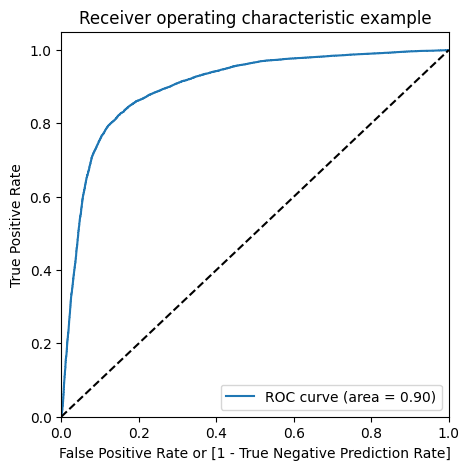

In [111]:
# Plotting the curve for the obtained metrics
draw_roc(y_train_sm_pred_final.Converted, y_train_sm_pred_final.Converted_prob)

#### Finding Optimal Cutoff Point

In [112]:
# Creating columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_sm_pred_final[i]= y_train_sm_pred_final.Converted_prob.map(lambda x: 1 if x > i else 0)
y_train_sm_pred_final.head()

,Converted,Converted_prob,churn_pred,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.138574,0,1,1,0,0,0,0,0,0,0,0
1,0,0.401122,0,1,1,1,1,1,0,0,0,0,0
2,0,0.324276,0,1,1,1,1,0,0,0,0,0,0
3,0,0.414619,0,1,1,1,1,1,0,0,0,0,0
4,0,0.508730,1,1,1,1,1,1,1,0,0,0,0


In [113]:
# Calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['probability','accuracy','sensitivity','specificity'])
from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_sm_pred_final.Converted, y_train_sm_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    specificity = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensitivity = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensitivity,specificity]
print(cutoff_df)

     probability  accuracy  sensitivity  specificity
0.0  0.0          0.500000  1.000000     0.000000   
0.1  0.1          0.686696  0.977603     0.395790   
0.2  0.2          0.751996  0.957538     0.546454   
0.3  0.3          0.791321  0.925653     0.656989   
0.4  0.4          0.816881  0.891176     0.742586   
0.5  0.5          0.834042  0.856128     0.811956   
0.6  0.6          0.836116  0.805682     0.866549   
0.7  0.7          0.820795  0.730350     0.911240   
0.8  0.8          0.755003  0.561230     0.948776   
0.9  0.9          0.614294  0.248185     0.980402   


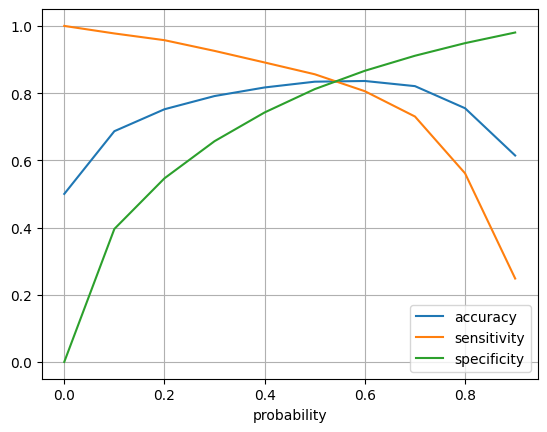

In [114]:
# plotting accuracy sensitivity and specificity for various probabilities calculated above.
cutoff_df.plot.line(x='probability', y=['accuracy','sensitivity','specificity'])
plt.grid()
plt.show()


**Initially we selected the optimum point of classification as 0.5.<br><br>From the above graph, we can see the optimum cutoff is around 0.54**

In [115]:
#Create columns with refined probability cutoffs 
numbers = [0.50,0.51,0.52,0.53,0.54,0.55,0.56,0.57,0.58,0.59]
for i in numbers:
    y_train_sm_pred_final[i]= y_train_sm_pred_final.Converted_prob.map(lambda x: 1 if x > i else 0)
y_train_sm_pred_final.head()

,Converted,Converted_prob,churn_pred,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,0.51,0.52,0.53,0.54,0.55,0.56,0.57,0.58,0.59
0,0,0.138574,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0.401122,0,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0.324276,0,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0.414619,0,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0.508730,1,1,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0


In [116]:
# Calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['probability','accuracy','sensitivity','specificity'])
from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.50,0.51,0.52,0.53,0.54,0.55,0.56,0.57,0.58,0.59]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_sm_pred_final.Converted, y_train_sm_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    specificity = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensitivity = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensitivity,specificity]
print(cutoff_df)

      probability  accuracy  sensitivity  specificity
0.50  0.50         0.834042  0.856128     0.811956   
0.51  0.51         0.835001  0.851669     0.818333   
0.52  0.52         0.835675  0.846796     0.824554   
0.53  0.53         0.836038  0.841611     0.830465   
0.54  0.54         0.836245  0.836375     0.836116   
0.55  0.55         0.836064  0.830983     0.841145   
0.56  0.56         0.837075  0.826991     0.847159   
0.57  0.57         0.837179  0.821910     0.852447   
0.58  0.58         0.836219  0.815896     0.856543   
0.59  0.59         0.835831  0.810452     0.861209   


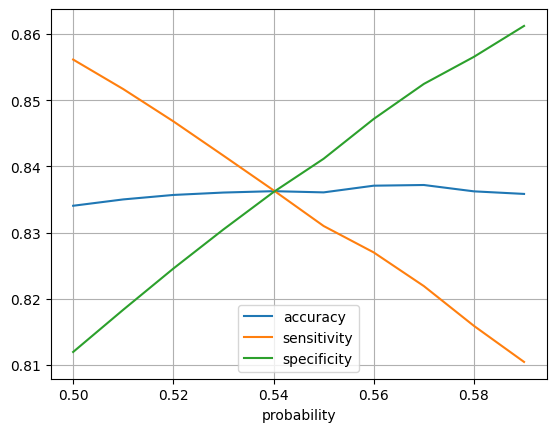

In [117]:
# plotting accuracy sensitivity and specificity for various probabilities calculated above.
cutoff_df.plot.line(x='probability', y=['accuracy','sensitivity','specificity'])
plt.grid()
plt.show()


**From the above graph we can conclude, the optimal cutoff point in the probability to define the predicted churn variabe converges at `0.54`**

In [118]:
#### From the curve above, 0.2 is the optimum point to take it as a cutoff probability.

y_train_sm_pred_final['final_churn_pred'] = y_train_sm_pred_final.Converted_prob.map( lambda x: 1 if x > 0.54 else 0)

y_train_sm_pred_final.head()

,Converted,Converted_prob,churn_pred,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,0.51,0.52,0.53,0.54,0.55,0.56,0.57,0.58,0.59,final_churn_pred
0,0,0.138574,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0.401122,0,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0.324276,0,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0.414619,0,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0.508730,1,1,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [119]:
# Calculating the ovearall accuracy again
print("The overall accuracy of the model now is:",metrics.accuracy_score(y_train_sm_pred_final.Converted, y_train_sm_pred_final.final_churn_pred))

The overall accuracy of the model now is: 0.8362453338863542


In [120]:
confusion2 = metrics.confusion_matrix(y_train_sm_pred_final.Converted, y_train_sm_pred_final.final_churn_pred )
print(confusion2)

[[16127  3161]
 [ 3156 16132]]


In [121]:
TP2 = confusion2[1,1] # true positive 
TN2 = confusion2[0,0] # true negatives
FP2 = confusion2[0,1] # false positives
FN2 = confusion2[1,0] # false negatives

# Sensitivity of our logistic regression model
print("Sensitivity = ",TP2 / float(TP2+FN2))

# Calculating specificity
print("Specificity = ",TN2 / float(TN2+FP2))

# Calculating false postive rate - predicting churn when customer does not have churned
print("False Positive Rate = ",FP2/ float(TN2+FP2))

# Positive predictive value 
print ("Precision = ",TP2 / float(TP2+FP2))

# Negative predictive value
print ("True Negative Prediction Rate = ",TN2 / float(TN2 + FN2))

Sensitivity =  0.8363749481542928
Specificity =  0.8361157196184156
False Positive Rate =  0.1638842803815844
Precision =  0.8361581920903954
True Negative Prediction Rate =  0.8363325208733081


#### Precision and recall tradeoff

In [122]:
from sklearn.metrics import precision_recall_curve

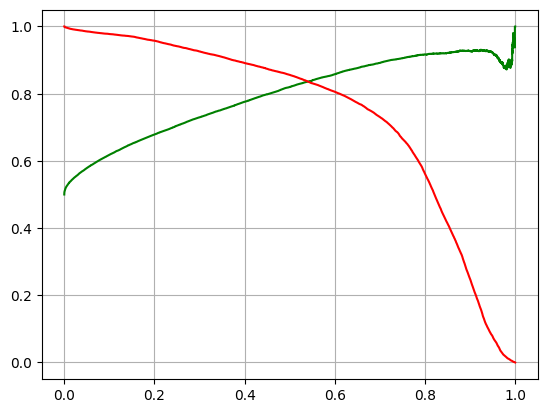

In [123]:
p, r, thresholds = precision_recall_curve(y_train_sm_pred_final.Converted, y_train_sm_pred_final.Converted_prob)

# Plotting the curve
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.grid()
plt.show()


### Evaluating model based on both train and test

### Making predictions on the test set

**Transforming and feature selection for test data**

In [124]:
# Scaling the test data
X_test[num_col] = scaler.transform(X_test[num_col])
X_test.head()

,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2m_mou_6,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,total_rech_data_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,av_rech_amt_data_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,overall_rech_amt_6,overall_rech_amt_7,avg_rech_amt_6_7,avg_arpu_6_7,total_rech_data_group_8_<=10_Recharges,total_rech_data_group_8_10-25_Recharges,total_rech_data_group_8_>25_Recharges,total_rech_num_group_8_<=10_Recharges,total_rech_num_group_8_10-25_Recharges,total_rech_num_group_8_>25_Recharges,tenure_range_6-12 Months,tenure_range_1-2 Yrs,tenure_range_2-5 Yrs,tenure_range_5 Yrs and above
35865,0.026143,0.021027,0.000000,0.000070,0.003412,0.000575,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000249,0.000000,0.000000,0.003565,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.001734,0.000000,0.000000,0.001402,0.000000,0.000000,0.0,0.019587,0.000000,0.000054,0.0,0.000000,0.004941,0.000000,0.000000,0.0,0.0,0.017204,0.000489,0.000053,0.001493,0.001937,0.000162,0.003225,0.002280,0.002466,0.000077,0.000000,0.002178,0.003321,0.003182,0.002782,0.000000,0.000041,0.000023,0.001853,0.000000,0.010098,0.0,0.0,0.0,0.001572,0.000036,0.009587,0.0,0.018753,0.000000,0.000053,0.000000,0.000000,0.0,0.000000,0.0,0.016287,0.050725,0.010204,0.022444,0.006234,0.002248,0.004239,0.002494,0.000000,0.000000,0.010932,0.016077,0.000000,0.000000,0.008393,0.041051,0.000000,0.000000,0.000000,0.000000,0.00,0.0,0.0,0.02381,0.104167,0.000000,0.000000,0.0000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.002203,0.012662,0.000033,0.059622,0,0,0,1,0,0,1,0,0,0
41952,0.048190,0.005702,0.005250,0.002058,0.011146,0.023873,0.007510,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.006489,0.004028,0.002058,0.000516,0.003132,0.005379,0.000000,0.001285,0.000409,0.000000,0.036826,0.0,0.004151,0.005882,0.003767,0.010557,0.004741,0.018985,0.0,0.010802,0.018971,0.006132,0.0,0.000000,0.020936,0.000000,0.000000,0.0,0.0,0.012674,0.024301,0.009067,0.025150,0.049448,0.023064,0.002868,0.011624,0.005979,0.000000,0.000000,0.000000,0.023235,0.051159,0.022029,0.003628,0.011922,0.005535,0.018785,0.038543,0.004938,0.0,0.0,0.0,0.019560,0.030083,0.008684,0.0,0.000000,0.000000,0.000000,0.006005,0.000000,0.0,0.012541,0.0,0.009772,0.043478,0.020408,0.049875,0.037406,0.032592,0.049875,0.021446,0.011238,0.017544,0.097749,0.093248,0.093248,0.035705,0.002835,0.002872,0.004586,0.001774,0.029730,0.009727,0.00,0.0,0.0,0.02381,0.000000,0.000000,0.071429,0.0625,0.034483,0.0,0.0,0.019572,0.057999,0.000000,0.008444,0.009309,0.004312,0.075152,1,0,0,1,0,0,0,0,1,0
98938,0.061230,0.003

In [125]:
# Feature selection
X_test=X_test[rfe_columns_2]
X_test.head()

,arpu_8,roam_ic_mou_7,roam_og_mou_8,loc_og_t2m_mou_8,std_og_mou_7,total_og_mou_8,loc_ic_mou_6,loc_ic_mou_8,std_ic_mou_8,spl_ic_mou_8,total_rech_num_8,last_day_rch_amt_8,total_rech_data_8,av_rech_amt_data_8,vol_2g_mb_8,monthly_2g_8,aug_vbc_3g,avg_arpu_6_7
35865,0.026143,0.000000,0.000000,0.000000,0.000000,0.000053,0.003321,0.002782,0.009587,0.000000,0.010204,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.059622
41952,0.048190,0.000000,0.000000,0.005379,0.018971,0.009067,0.023235,0.022029,0.008684,0.000000,0.020408,0.011238,0.017544,0.035705,0.004586,0.0,0.019572,0.075152
98938,0.061230,0.000000,0.000000,0.073716,0.000374,0.024987,0.057580,0.183375,0.003706,0.000000,0.035714,0.029220,0.035088,0.124107,0.056568,0.0,0.211621,0.095894
29459,0.042998,0.000000,0.000000,0.000000,0.000000,0.000800,0.001622,0.000037,0.011386,0.000000,0.025510,0.034615,0.052632,0.063039,0.008221,0.2,0.068735,0.070960
70682,0.098384,0.000721,0.031491,0.041749,0.172443,0.157573,0.021147,0.066205,0.002352,0.080257,0.061224,0.029220,0.017544,0.005664,0.000000,0.0,0.000000,0.101081


In [126]:
# Adding constant to the test model.
X_test_SM = sm.add_constant(X_test)

**Predicting the target variable**

In [127]:
y_test_pred = res.predict(X_test_SM)
print("\n The first ten probability value of the prediction are:\n",y_test_pred[:10])


 The first ten probability value of the prediction are:
 35865    0.772260
41952    0.516558
98938    0.000325
29459    0.128443
70682    0.007754
58317    0.237200
4860     0.007990
16890    0.702931
61329    0.652452
94332    0.491091
dtype: float64


In [128]:
y_pred = pd.DataFrame(y_test_pred)
y_pred.head()

,0
35865,0.772260
41952,0.516558
98938,0.000325
29459,0.128443
70682,0.007754


In [129]:
y_pred=y_pred.rename(columns = {0:"Conv_prob"})

In [130]:
y_test_df = pd.DataFrame(y_test)
y_test_df.head()

,churn
35865,0
41952,0
98938,0
29459,0
70682,0


In [131]:
y_pred_final = pd.concat([y_test_df,y_pred],axis=1)
y_pred_final.head()

,churn,Conv_prob
35865,0,0.772260
41952,0,0.516558
98938,0,0.000325
29459,0,0.128443
70682,0,0.007754


In [132]:
y_pred_final['test_churn_pred'] = y_pred_final.Conv_prob.map(lambda x: 1 if x>0.54 else 0)
y_pred_final.head()

,churn,Conv_prob,test_churn_pred
35865,0,0.772260,1
41952,0,0.516558,0
98938,0,0.000325,0
29459,0,0.128443,0
70682,0,0.007754,0


In [133]:
# Checking the overall accuracy of the predicted set.
metrics.accuracy_score(y_pred_final.churn, y_pred_final.test_churn_pred)

0.8270192200866571

**Metrics Evaluation**

In [134]:
# Confusion Matrix
confusion2_test = metrics.confusion_matrix(y_pred_final.churn, y_pred_final.test_churn_pred)
print("Confusion Matrix\n",confusion2_test)

Confusion Matrix
 [[6860 1412]
 [ 145  584]]


In [135]:
# Calculating model validation parameters
TP3 = confusion2_test[1,1] # true positive 
TN3 = confusion2_test[0,0] # true negatives
FP3 = confusion2_test[0,1] # false positives
FN3 = confusion2_test[1,0] # false negatives

In [136]:
#Sensitivity of our logistic regression model
print("Sensitivity = ",TP3 / float(TP3+FN3))

# Calculating specificity
print("Specificity = ",TN3 / float(TN3+FP3))

# Calculating false postive rate - predicting churn when customer does not have churned
print("False Positive Rate = ",FP3/ float(TN3+FP3))

# Positive predictive value 
print ("Precision = ",TP3 / float(TP3+FP3))

# Negative predictive value
print ("True Negative Prediction Rate = ",TN3 / float(TN3+FN3))

Sensitivity =  0.8010973936899863
Specificity =  0.8293036750483559
False Positive Rate =  0.1706963249516441
Precision =  0.2925851703406814
True Negative Prediction Rate =  0.979300499643112


### Results Explanation

In [137]:
print("The accuracy of the predicted model is: ",round(metrics.accuracy_score(y_pred_final.churn, y_pred_final.test_churn_pred),2)*100,"%")
print("The sensitivity of the predicted model is: ",round(TP3 / float(TP3+FN3),2)*100,"%")

print("\nAs the model created is based on a sentivity model, i.e. the True positive rate is given more importance as the actual and prediction of churn by a customer\n") 

The accuracy of the predicted model is:  83.0 %
The sensitivity of the predicted model is:  80.0 %

As the model created is based on a sentivity model, i.e. the True positive rate is given more importance as the actual and prediction of churn by a customer



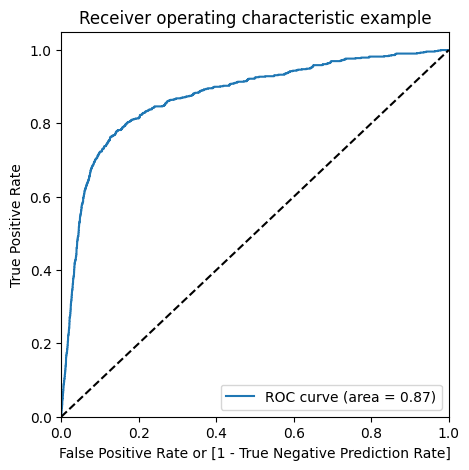

In [138]:
# ROC curve for the test DataFrame

# Defining the variables to plot the curve
fpr, tpr, thresholds = metrics.roc_curve(y_pred_final.churn,y_pred_final.Conv_prob, drop_intermediate = False )
# Plotting the curve for the obtained metrics
draw_roc(y_pred_final.churn,y_pred_final.Conv_prob)


**The AUC score for train DataFrame is 0.90 and the test DataFrame is 0.87.<br> This model can be considered as a good model.**

Performing PCA for feature reduction

#### Logistic Regression using PCA

In [139]:
# split the dateset into train and test DataFrame

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, train_size=0.7, random_state=1)
print("Dimension of X_train:", X_train.shape)
print("Dimension of X_test:", X_test.shape)

# apply scaling on the DataFrame

scaler = MinMaxScaler()
X_train[num_col] = scaler.fit_transform(X_train[num_col])
X_test[num_col] = scaler.transform(X_test[num_col])

# Applying SMOTE technique for data imbalance correction

sm = SMOTE(random_state=42)
X_train_sm,y_train_sm = sm.fit_resample(X_train,y_train)
print("Dimension of X_train_sm Shape:", X_train_sm.shape)
print("Dimension of y_train_sm Shape:", y_train_sm.shape)

X_train_sm.head()

Dimension of X_train: (21000, 126)
Dimension of X_test: (9001, 126)
Dimension of X_train_sm Shape: (38576, 126)
Dimension of y_train_sm Shape: (38576,)


,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2m_mou_6,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,total_rech_data_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,av_rech_amt_data_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,overall_rech_amt_6,overall_rech_amt_7,avg_rech_amt_6_7,avg_arpu_6_7,total_rech_data_group_8_<=10_Recharges,total_rech_data_group_8_10-25_Recharges,total_rech_data_group_8_>25_Recharges,total_rech_num_group_8_<=10_Recharges,total_rech_num_group_8_10-25_Recharges,total_rech_num_group_8_>25_Recharges,tenure_range_6-12 Months,tenure_range_1-2 Yrs,tenure_range_2-5 Yrs,tenure_range_5 Yrs and above
0,0.038904,0.000235,0.000531,0.000238,0.004211,0.003651,0.004095,0.0,0.000000,0.0,0.0,0.00000,0.0,0.000269,0.000585,0.000238,0.007005,0.006330,0.015246,0.003075,0.000000,0.000980,0.000000,0.010426,0.006708,0.003471,0.004240,0.005214,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.006292,0.002472,0.000000,0.0,0.0,0.003461,0.003487,0.004268,0.004415,0.005650,0.012348,0.014898,0.012389,0.018297,0.001078,0.003333,0.000000,0.013386,0.014004,0.024154,0.000000,0.000000,0.000000,0.001320,0.000000,0.000000,0.0,0.00000,0.0,0.001119,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.009772,0.050725,0.015306,0.038404,0.038404,0.034615,0.038404,0.038404,0.034615,0.017544,0.099035,0.099035,0.099035,0.037922,0.003367,0.026477,0.021871,0.000000,0.000000,0.000000,0.25,0.25,0.2,0.000000,0.041667,0.0,0.000000,0.0000,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.003420,0.015354,0.002411,0.063393,1,0,0,1,0,0,0,0,0,0
1,0.032921,0.000493,0.000000,0.000000,0.001631,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.00000,0.0,0.000566,0.000000,0.000000,0.002533,0.000000,0.000000,0.002454,0.000000,0.000000,0.000000,0.000000,0.000000,0.001624,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.001620,0.000000,0.000000,0.013088,0.007020,0.003657,0.041620,0.021697,0.014587,0.013215,0.008694,0.000000,0.040335,0.022862,0.014662,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.00209,0.0,0.000000,0.000316,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.055375,0.108696,0.040816,0.009227,0.009227,0.008316,0.009227,0.005985,0.005619,0.105263,0.016077,0.016077,0.016077,0.034967,0.064367,0.045634,0.035909,0.000332,0.000000,0.000000,0.00,0.00,0.0,0.166667,0.083333,0.0,0.000000,0.0000,0.0,0.057143,0.0,0.000000,0.000000,0.0,0.009431,0.020687,0.010484,0.068877,1,0,0,1,0,0,0,0,1,0
2,0.033826,0.000876,0.000275,0.000714,0.003861,0

In [140]:
# importing PCA
# Principal Component Analysis is an unsupervised learning algorithm that is used for the dimensionality reduction in machine learning.
from sklearn.decomposition import PCA
pca = PCA(random_state=42)

# applying PCA on train data
pca.fit(X_train_sm)

PCA(random_state=42)

In [141]:
X_train_sm_pca=pca.fit_transform(X_train_sm)
print("Dimension of X_train_sm_pca: ",X_train_sm_pca.shape)

X_test_pca=pca.transform(X_test)
print("Dimension of X_test_pca: ",X_test_pca.shape)

Dimension of X_train_sm_pca:  (38576, 126)
Dimension of X_test_pca:  (9001, 126)


In [142]:
#Viewing the PCA components
pca.components_

array([[ 1.77080250e-02,  5.62945551e-03,  1.28071557e-02, ...,
        -8.33377373e-02,  2.03169293e-01, -2.25884463e-04],
       [ 1.17884332e-03,  1.36226801e-04,  2.66567649e-03, ...,
         6.62002105e-01, -7.17541378e-01,  1.93966990e-04],
       [ 8.31908962e-03, -2.32698646e-02, -1.53378013e-02, ...,
         7.54642802e-02,  5.50287343e-02,  1.26734621e-03],
       ...,
       [-3.94307290e-07,  1.32661563e-06, -2.21287989e-06, ...,
        -3.76725866e-08, -1.42403279e-08,  2.74517958e-08],
       [ 2.29473384e-07, -1.88640723e-06,  1.53383133e-06, ...,
        -3.64244932e-08, -2.71775060e-08, -3.24942343e-08],
       [ 0.00000000e+00, -1.37405826e-15, -1.12437795e-15, ...,
        -9.54450339e-18, -8.38545455e-18, -1.67814258e-17]])

#### Performing Logistic Regression

In [143]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
logreg_pca = LogisticRegression()
logreg_pca.fit(X_train_sm_pca, y_train_sm)

# making the predictions
y_pred = logreg_pca.predict(X_test_pca)

# converting the prediction into a dataframe
y_pred_df = pd.DataFrame(y_pred)
print("Dimension of y_pred_df:", y_pred_df.shape)

Dimension of y_pred_df: (9001, 1)


In [144]:
from sklearn.metrics import confusion_matrix, accuracy_score

# Checking the Confusion matrix
print("Confusion Matirx for y_test & y_pred\n",confusion_matrix(y_test,y_pred),"\n")

# Checking the Accuracy of the Predicted model.
print("Accuracy of the logistic regression model with PCA: ",accuracy_score(y_test,y_pred))

Confusion Matirx for y_test & y_pred
 [[6760 1512]
 [ 127  602]] 

Accuracy of the logistic regression model with PCA:  0.8179091212087546


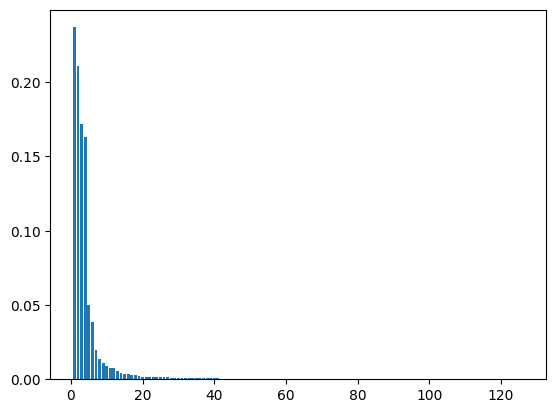

In [145]:
plt.bar(range(1,len(pca.explained_variance_ratio_)+1),pca.explained_variance_ratio_)
plt.show()

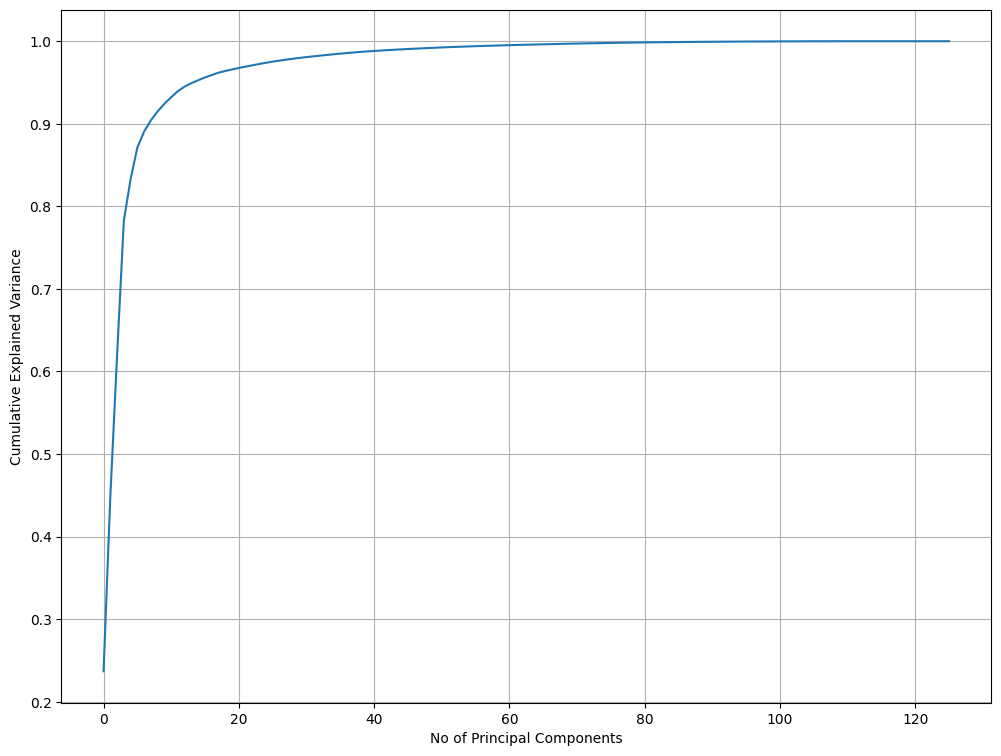

In [146]:
var_cumu = np.cumsum(pca.explained_variance_ratio_)

# Making a scree plot - plotting the cumulative variance against the number of components
# plotting the cumulative variance against the number of components
fig = plt.figure(figsize=[12,9])
plt.plot(var_cumu)
plt.xlabel('No of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.grid()
plt.show()


In [147]:
np.cumsum(np.round(pca.explained_variance_ratio_, decimals=3)*100)

array([23.7, 44.8, 62. , 78.3, 83.3, 87.1, 89. , 90.4, 91.5, 92.4, 93.2,
       93.9, 94.5, 94.9, 95.3, 95.6, 95.9, 96.2, 96.4, 96.6, 96.8, 97. ,
       97.2, 97.4, 97.5, 97.6, 97.7, 97.8, 97.9, 98. , 98.1, 98.2, 98.3,
       98.4, 98.5, 98.6, 98.7, 98.8, 98.9, 99. , 99.1, 99.2, 99.3, 99.3,
       99.3, 99.3, 99.3, 99.3, 99.3, 99.3, 99.3, 99.3, 99.3, 99.3, 99.3,
       99.3, 99.3, 99.3, 99.3, 99.3, 99.3, 99.3, 99.3, 99.3, 99.3, 99.3,
       99.3, 99.3, 99.3, 99.3, 99.3, 99.3, 99.3, 99.3, 99.3, 99.3, 99.3,
       99.3, 99.3, 99.3, 99.3, 99.3, 99.3, 99.3, 99.3, 99.3, 99.3, 99.3,
       99.3, 99.3, 99.3, 99.3, 99.3, 99.3, 99.3, 99.3, 99.3, 99.3, 99.3,
       99.3, 99.3, 99.3, 99.3, 99.3, 99.3, 99.3, 99.3, 99.3, 99.3, 99.3,
       99.3, 99.3, 99.3, 99.3, 99.3, 99.3, 99.3, 99.3, 99.3, 99.3, 99.3,
       99.3, 99.3, 99.3, 99.3, 99.3])

 **90% of the data can be explained with 8 PCA components**

**Fitting the DataFrame with the 8 explainable components**

In [148]:
pca = PCA(n_components=15)

train_pca = pca.fit_transform(X_train_sm)
print("Dimension for Train DataFrame using PCA: ", train_pca.shape)

test_pca = pca.transform(X_test)
print("Dimension for Test DataFrame using PCA: ", test_pca.shape)

Dimension for Train DataFrame using PCA:  (38576, 15)
Dimension for Test DataFrame using PCA:  (9001, 15)


In [149]:
logreg_pca = LogisticRegression()
logreg_pca.fit(train_pca, y_train_sm)

# making the predictions
y_pred = logreg_pca.predict(test_pca)

# converting the prediction into a dataframe
y_pred_df = pd.DataFrame(y_pred)
print("Dimension of y_pred_df: ", y_pred_df.shape)

Dimension of y_pred_df:  (9001, 1)


In [150]:
# Checking the data of y_pred_df
y_pred_df.head()

,0
0,1
1,0
2,0
3,0
4,0


In [151]:
# Checking the Confusion matrix
print("Confusion Matirx for y_test & y_pred\n",confusion_matrix(y_test,y_pred),"\n")

# Checking the Accuracy of the Predicted model.
print("Accuracy of the logistic regression model with PCA: ",accuracy_score(y_test,y_pred))

Confusion Matirx for y_test & y_pred
 [[6250 2022]
 [ 185  544]] 

Accuracy of the logistic regression model with PCA:  0.7548050216642596


#### Using SVM Model

In [152]:
# using rbf kernel, C=1, default value of gamma
from sklearn.svm import SVC

model = SVC(C = 1, kernel='rbf')
model.fit(train_pca, y_train_sm)
y_pred = model.predict(test_pca)

In [153]:
# confusion matrix
confusion_matrix(y_true=y_test, y_pred=y_pred)

array([[6494, 1778],
       [ 188,  541]], dtype=int64)

In [154]:
# accuracy
print("accuracy", metrics.accuracy_score(y_test, y_pred))

# precision
print("precision", metrics.precision_score(y_test, y_pred))

# recall/sensitivity
print("recall", metrics.recall_score(y_test, y_pred))

accuracy 0.7815798244639485
precision 0.23329021129797325
recall 0.7421124828532236


## Hyperparameter Tuning 

We have multiple hyperparameters to optimise - 
- The choice of kernel (linear, rbf etc.)
- C
- gamma

We'll use the ```GridSearchCV()``` method to tune the hyperparameters. 

In [155]:

from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV

# creating a KFold object with 5 splits 
folds = KFold(n_splits = 5, shuffle = True, random_state = 4)

# specify range of hyperparameters
# Set the parameters by cross-validation
hyper_params = [ {'gamma': [1e-2, 1e-3, 1e-4],
                     'C': [1, 10, 100, 1000]}]


# specify model
model = SVC(kernel="rbf")

# set up GridSearchCV()
model_cv = GridSearchCV(estimator = model, 
                        param_grid = hyper_params, 
                        scoring= 'roc_auc', 
                        cv = folds,
                        n_jobs = -1,
                        verbose = 1,
                        return_train_score=True)      

# fit the model
model_cv.fit(X_train,y_train)

Fitting 5 folds for each of 12 candidates, totalling 60 fits


GridSearchCV(cv=KFold(n_splits=5, random_state=4, shuffle=True),
             estimator=SVC(), n_jobs=-1,
             param_grid=[{'C': [1, 10, 100, 1000],
                          'gamma': [0.01, 0.001, 0.0001]}],
             return_train_score=True, scoring='roc_auc', verbose=1)

In [156]:
# cv results
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_gamma,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,28.922401,1.180072,9.311119,0.125259,1,0.01,"{'C': 1, 'gamma': 0.01}",0.870448,0.836568,0.841561,0.853487,0.871677,0.854748,0.014416,7,0.873634,0.868850,0.867219,0.875893,0.873620,0.871843,0.003259
1,23.546854,1.341526,9.286094,0.205992,1,0.001,"{'C': 1, 'gamma': 0.001}",0.849384,0.812943,0.840697,0.828591,0.827862,0.831895,0.012407,11,0.830600,0.844821,0.849106,0.846718,0.822290,0.838707,0.010440
2,21.728374,0.574799,8.719241,0.102794,1,0.0001,"{'C': 1, 'gamma': 0.0001}",0.865413,0.819287,0.804851,0.823000,0.720142,0.806539,0.047680,12,0.856499,0.832322,0.818527,0.840769,0.714203,0.812464,0.050649
3,29.091882,0.976422,9.289886,0.308603,10,0.01,"{'C': 10, 'gamma': 0.01}",0.870583,0.846916,0.849504,0.854933,0.879396,0.860266,0.012609,6,0.877006,0.884273,0.877015,0.881955,0.880775,0.880205,0.002840
4,26.549687,1.576064,9.756345,0.333058,10,0.001,"{'C': 10, 'gamma': 0.001}",0.842195,0.839512,0.841746,0.843282,0.867328,0.846813,0.010331,9,0.840019,0.861866,0.865993,0.864124,0.865639,0.859528,0.009862
5,23.072027,1.064571,9.234572,0.207375,10,0.0001,"{'C': 10, 'gamma': 0.0001}",0.844133,0.828898,0.832509,0.830256,0.863795,0.839918,0.013096,10,0.826699,0.851093,0.850839,0.846569,0.862953,0.847631,0.011801
6,30.130130,0.857713,9.248904,0.493307,100,0.01,"{'C': 100, 'gamma': 0.01}",0.868997,0.848198,0.850015,0.856997,0.880127,0.860867,0.012085,5,0.880110,0.889373,0.881170,0.886415,0.885414,0.884496,0.003424
7,29.896508,1.419996,9.298238,0.360509,100,0.001,"{'C': 100, 'gamma': 0.001}",0.879830,0.852802,0.850448,0.856982,0.877279,0.863468,0.012520,4,0.869885,0.879344,0.875660,0.878767,0.879390,0.876609,0.003633
8,26.475413,0.682744,9.760836,0.393436,100,0.0001,"{'C': 100, 'gamma': 0.0001}",0.861214,0.853563,0.842880,0.853327,0.857312,0.853659,0.006111,8,0.857510,0.870358,0.859506,0.870151,0.860949,0.863695,0.005467
9,35.208911,0.984800,9.045133,0.259538,1000,0.01,"{'C': 1000, 'gamma': 0.01}",0.878780,0.852502,0.866726,0.859903,0.887108,0.869004,0.012519,1,0.893969,0.903698,0.900331,0.900254,0.896596,0.898970,0.003362


In [157]:
# printing the optimal roc score and hyperparameters
best_score = model_cv.best_score_
best_hyperparams = model_cv.best_params_

print("The best test score is {0} corresponding to hyperparameters {1}".format(best_score, best_hyperparams))

The best test score is 0.8690038329056764 corresponding to hyperparameters {'C': 1000, 'gamma': 0.01}


In [158]:
# specify optimal hyperparameters
best_params = {"C": 100, "gamma": 0.01, "kernel":"rbf"}

# model
model = SVC(C=100, gamma=0.01, kernel="rbf")

model.fit(X_train,y_train)
y_pred = model.predict(X_test)

# metrics
print(metrics.confusion_matrix(y_test, y_pred), "\n")
print("accuracy", metrics.accuracy_score(y_test, y_pred))
print("precision", metrics.precision_score(y_test, y_pred))
print("sensitivity/recall", metrics.recall_score(y_test, y_pred))
print("roc_auc_score", metrics.roc_auc_score(y_test, y_pred))

[[8199   73]
 [ 636   93]] 

accuracy 0.9212309743361848
precision 0.5602409638554217
sensitivity/recall 0.12757201646090535
roc_auc_score 0.5593735324084024


#### Using Random Forest Model

In [159]:
# Importing random forest classifier from sklearn library
from sklearn.ensemble import RandomForestClassifier

# Running the random forest with default parameters.
rfc = RandomForestClassifier()
# fit
rfc.fit(X_train,y_train)

RandomForestClassifier()

In [160]:
# Making predictions
predictions = rfc.predict(X_test)

In [161]:
# Importing classification report and confusion matrix from sklearn metrics
from sklearn.metrics import classification_report,confusion_matrix, accuracy_score

In [162]:
# Let's check the report of our default model
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.95      0.98      0.97      8272
           1       0.70      0.43      0.53       729

    accuracy                           0.94      9001
   macro avg       0.83      0.71      0.75      9001
weighted avg       0.93      0.94      0.93      9001



In [163]:
# GridSearchCV to find optimal min_samples_split
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
# Create the parameter grid based on the results of random search 
param_grid = {
    'max_depth': [4,8,10],
    'min_samples_leaf': range(100, 400, 200),
    'min_samples_split': range(200, 500, 200),
    'n_estimators': [100,200, 300], 
    'max_features': [3, 6]
}
# Create a based model
rf = RandomForestClassifier()
# Instantiate the grid search model
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid,scoring= 'roc_auc', 
                          cv = 3, n_jobs = -1,verbose = 1)

# Fit the grid search to the data
grid_search.fit(X_train,y_train)

Fitting 3 folds for each of 72 candidates, totalling 216 fits


GridSearchCV(cv=3, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'max_depth': [4, 8, 10], 'max_features': [3, 6],
                         'min_samples_leaf': range(100, 400, 200),
                         'min_samples_split': range(200, 500, 200),
                         'n_estimators': [100, 200, 300]},
             scoring='roc_auc', verbose=1)

In [164]:
# printing the optimal accuracy score and hyperparameters
print('We can get best score of',grid_search.best_score_,'using',grid_search.best_params_)

We can get best score of 0.9135183065595 using {'max_depth': 10, 'max_features': 6, 'min_samples_leaf': 100, 'min_samples_split': 200, 'n_estimators': 200}


In [165]:
# model with the best hyperparameters
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(bootstrap=True,
                             max_depth=10,
                             min_samples_leaf=100, 
                             min_samples_split=200,
                             max_features=6,
                             n_estimators=200)

In [166]:
# fit
rfc.fit(X_train,y_train)
# predict
predictions = rfc.predict(X_test)

In [167]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.94      0.99      0.96      8272
           1       0.74      0.25      0.37       729

    accuracy                           0.93      9001
   macro avg       0.84      0.62      0.67      9001
weighted avg       0.92      0.93      0.92      9001



In [168]:
# metrics
print(metrics.confusion_matrix(y_test, predictions), "\n")
print("accuracy", metrics.accuracy_score(y_test, predictions))
print("precision", metrics.precision_score(y_test, predictions))
print("sensitivity/recall", metrics.recall_score(y_test, predictions))
print("roc_auc_score", metrics.roc_auc_score(y_test, predictions))

[[8208   64]
 [ 549  180]] 

accuracy 0.931896455949339
precision 0.7377049180327869
sensitivity/recall 0.24691358024691357
roc_auc_score 0.6195883181698785


## 7.Model Selection

## Based on the above models the best model is first one i.e Logistic regression model which gives recall of 81% and ROC value of 0.89

In [169]:
def plot_feature_importances(clf, X_train, y_train=None, 
                             top_n=10, figsize=(8,8), print_table=False, title="Feature Importances"):
    '''
    plot feature importances of a tree-based sklearn estimator
    
    Note: X_train and y_train are pandas DataFrames
    
    Note: Scikit-plot is a lovely package but I sometimes have issues
              1. flexibility/extendibility
              2. complicated models/datasets
          But for many situations Scikit-plot is the way to go
          see https://scikit-plot.readthedocs.io/en/latest/Quickstart.html
    
    Parameters
    ----------
        clf         (sklearn estimator) if not fitted, this routine will fit it
        
        X_train     (pandas DataFrame)
        
        y_train     (pandas DataFrame)  optional
                                        required only if clf has not already been fitted 
        
        top_n       (int)               Plot the top_n most-important features
                                        Default: 10
                                        
        figsize     ((int,int))         The physical size of the plot
                                        Default: (8,8)
        
        print_table (boolean)           If True, print out the table of feature importances
                                        Default: False
        
    Returns
    -------
        the pandas dataframe with the features and their importance
        
    '''
    
    __name__ = "plot_feature_importances"
    
    import pandas as pd
    import numpy  as np
    import matplotlib.pyplot as plt
    
    try: 
        if not hasattr(clf, 'feature_importances_'):
            clf.fit(X_train.values, y_train.values.ravel())

            if not hasattr(clf, 'feature_importances_'):
                raise AttributeError("{} does not have feature_importances_ attribute".
                                    format(clf.__class__.__name__))
                
    except ( ValueError):
        clf.fit(X_train.values, y_train.values.ravel())
            
    feat_imp = pd.DataFrame({'importance':clf.feature_importances_})    
    feat_imp['feature'] = X_train.columns
    feat_imp.sort_values(by='importance', ascending=False, inplace=True)
    feat_imp = feat_imp.iloc[:top_n]
    
    feat_imp.sort_values(by='importance', inplace=True)
    feat_imp = feat_imp.set_index('feature', drop=True)
    feat_imp.plot.barh(title=title, figsize=figsize)
    plt.xlabel('Feature Importance Score')
    plt.show()
    
    if print_table:
        from IPython.display import display
        print("Top {} features in descending order of importance".format(top_n))
        display(feat_imp.sort_values(by='importance', ascending=False))
        
    return feat_imp

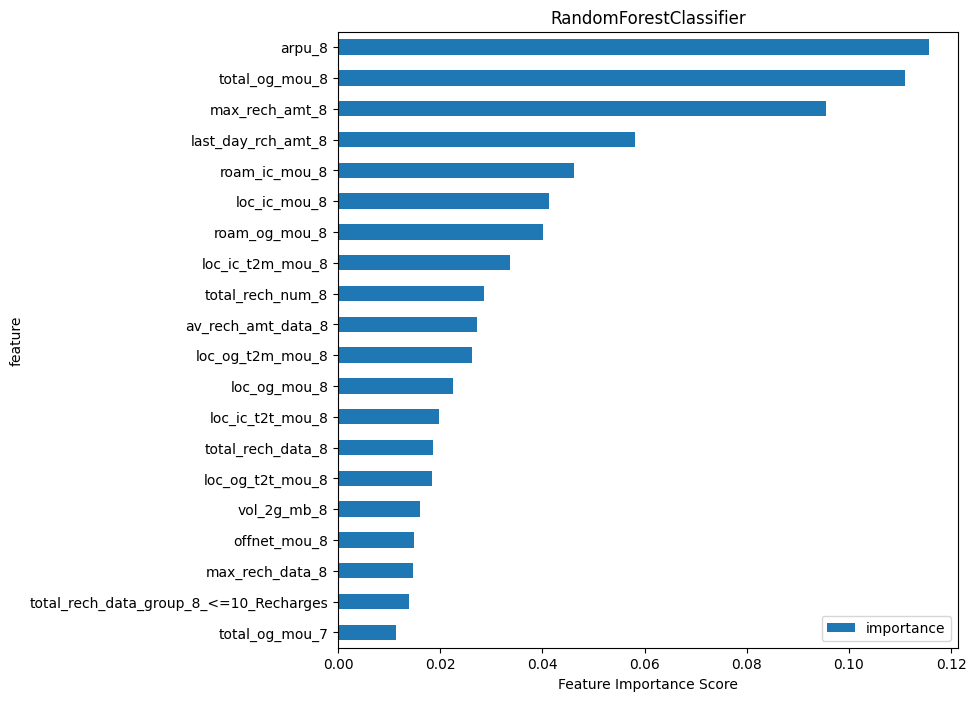

,importance
feature,
total_og_mou_7,0.011264
total_rech_data_group_8_<=10_Recharges,0.013918
max_rech_data_8,0.014734
offnet_mou_8,0.014825
vol_2g_mb_8,0.016053
loc_og_t2t_mou_8,0.018420
total_rech_data_8,0.018578
loc_ic_t2t_mou_8,0.019716
loc_og_mou_8,0.022573


In [170]:
plot_feature_importances(rfc, X_train, y_train, top_n=20,title=rfc.__class__.__name__)

### Above is the list of top 20 features with their scores which are important in predicting churn.
 


## 8. Conclusion

- Std Outgoing Calls and Revenue Per Customer are strong indicators of Churn.
- Local Incoming and Outgoing Calls for 8th Month and avg revenue in 8th Month are the most important columns to predict churn.
- Cutomers with tenure less than 4 yrs are more likely to churn.
- Max Recharge Amount is a strong feature to predict churn.
- Logistic Regression produced the best prediction results aftter tackling Class Imbalance